In [122]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib as plt

# INTENTO 1 / NUMERICAS CON MEDIA Y CATEGORICAS MODA / GRID Y SMOTE Y RANDOM FOREST

In [123]:
df = pd.read_csv('../df_cleaned.csv')

In [124]:
df.drop(columns='Unnamed: 0',inplace=True)


In [125]:
df.replace({'<NA>':np.nan}, inplace=True)


In [126]:
df

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54,1,4,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,NaN,NaN,NaN
912,180,55,1,2,110.0,214.0,1.0,1.0,180.0,0.0,NaN,NaN,NaN,NaN,NaN
913,181,67,1,3,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,NaN
914,182,59,1,1,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,NaN


In [127]:
df.dtypes


index         int64
age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
label       float64
dtype: object

In [128]:
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# Convertir columnas numéricas de nuevo a tipo numérico
df[float_cols] = df[float_cols].astype(float)

# Convertir columnas categóricas de nuevo a tipo categórico
df[categorical_cols] = df[categorical_cols].astype('category')

# Verificar que los dtypes han cambiado
print(df.dtypes)

index          int64
age            int64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
label        float64
dtype: object


In [129]:
df.isnull().sum()


index         0
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          89
restecg       2
thalach      55
exang        55
oldpeak      62
slope       308
ca          608
thal        483
label       184
dtype: int64

In [130]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'label']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Imputación para variables categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar que ya no hay valores faltantes
print(df.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


index       0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


In [131]:
train_end = df[0:732]
test_end = df[(916-184):]

In [132]:
train_end.isna().sum()

index       0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [133]:
test_end.isna().sum()

index       0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [134]:
train_end['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [135]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Asumiendo que ya tienes cargado tu DataFrame df_train
# Primero, vamos a separar las características (X) de las etiquetas (y)
X = train_end.drop('label', axis=1)  # Eliminar la columna 'label' para obtener las características
y = train_end['label']  # Las etiquetas son los valores de 'label'

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Ahora, X_res y y_res son tus características y etiquetas balanceadas, respectivamente


In [136]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imblearnPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir explícitamente la tubería
pipeline = imblearnPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier())  # Usar 'classifier' como placeholder
])

# Definir el espacio de parámetros para los modelos
param_grid = [
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 50, 100],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
]

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Asumiendo que X_res y y_res son tus características y etiquetas balanceadas
grid_search.fit(X_res, y_res)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)


Mejores parámetros: {'classifier': RandomForestClassifier(), 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
Mejor score: 0.7896024464831803


In [137]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo con los mejores parámetros encontrados
mejor_modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42  # Fijar una semilla para reproducibilidad
)

# Asumiendo que X_res y y_res son tus características y etiquetas balanceadas
mejor_modelo.fit(X_res, y_res)




RandomForestClassifier(random_state=42)

In [138]:
# Excluyendo la columna 'label'
test_end_sin_label = test_end.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones = mejor_modelo.predict(test_end_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades = mejor_modelo.predict_proba(test_end_sin_label)



In [139]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df = test_end.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df['label'] = predicciones

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df.head())



     index   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
732      0  57.0  1.0  4.0     156.0  173.0  0.0      2.0    119.0    1.0   
733      1  52.0  1.0  2.0     160.0  196.0  0.0      0.0    165.0    0.0   
734      2  48.0  1.0  2.0     100.0  223.0  0.0      0.0    100.0    0.0   
735      3  62.0  1.0  4.0     115.0    0.0  0.0      0.0    128.0    1.0   
736      4  51.0  1.0  3.0     110.0  175.0  0.0      0.0    123.0    0.0   

     oldpeak  slope   ca  thal  label  
732      3.0    3.0  0.0   3.0    4.0  
733      0.0    2.0  0.0   3.0    0.0  
734      0.0    2.0  0.0   3.0    0.0  
735      2.5    3.0  0.0   3.0    3.0  
736      0.6    1.0  0.0   3.0    0.0  


In [140]:
predicted_df

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
732,0,57.0,1.0,4.0,156.0,173.0,0.0,2.0,119.0,1.0,3.0,3.0,0.0,3.0,4.0
733,1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,2.0,0.0,3.0,0.0
734,2,48.0,1.0,2.0,100.0,223.0,0.0,0.0,100.0,0.0,0.0,2.0,0.0,3.0,0.0
735,3,62.0,1.0,4.0,115.0,0.0,0.0,0.0,128.0,1.0,2.5,3.0,0.0,3.0,3.0
736,4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,0.0,3.0,2.0
912,180,55.0,1.0,2.0,110.0,214.0,1.0,1.0,180.0,0.0,0.5,2.0,0.0,3.0,0.0
913,181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,0.0
914,182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,0.0


In [141]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df.reset_index(drop=True, inplace=True)
predicted_df['ID'] = predicted_df.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf = predicted_df[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf.to_csv('try6_data.csv', index=False)


In [142]:
# Excluyendo la columna 'label'
test_end_sin_label = test_end.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones = mejor_modelo.predict(test_end_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades = mejor_modelo.predict_proba(test_end_sin_label)



In [143]:
# Excluyendo la columna 'label'
test_end_sin_label = test_end.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones = mejor_modelo.predict(test_end_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades = mejor_modelo.predict_proba(test_end_sin_label)



In [144]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df = test_end.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df['label'] = predicciones

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df.head())



     index   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
732      0  57.0  1.0  4.0     156.0  173.0  0.0      2.0    119.0    1.0   
733      1  52.0  1.0  2.0     160.0  196.0  0.0      0.0    165.0    0.0   
734      2  48.0  1.0  2.0     100.0  223.0  0.0      0.0    100.0    0.0   
735      3  62.0  1.0  4.0     115.0    0.0  0.0      0.0    128.0    1.0   
736      4  51.0  1.0  3.0     110.0  175.0  0.0      0.0    123.0    0.0   

     oldpeak  slope   ca  thal  label  
732      3.0    3.0  0.0   3.0    4.0  
733      0.0    2.0  0.0   3.0    0.0  
734      0.0    2.0  0.0   3.0    0.0  
735      2.5    3.0  0.0   3.0    3.0  
736      0.6    1.0  0.0   3.0    0.0  


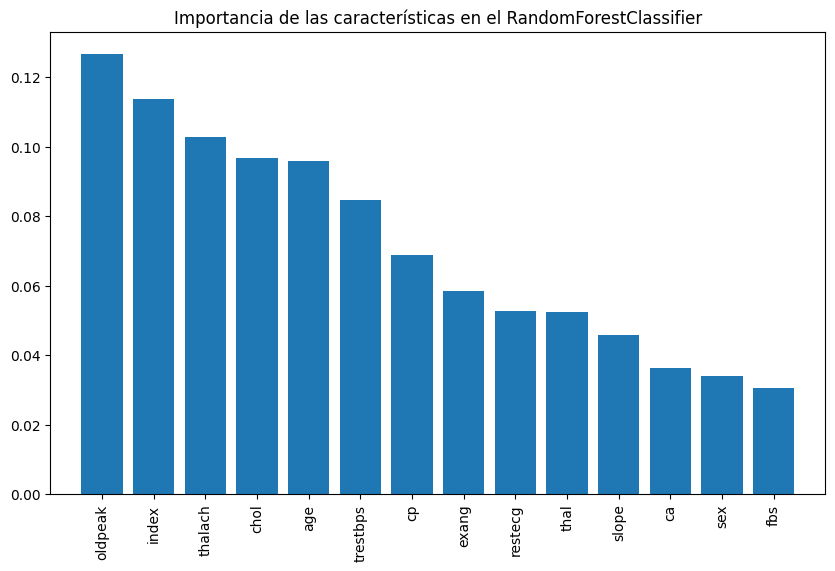

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = mejor_modelo.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end_sin_label.shape[1]])
plt.show()


In [146]:
predicted_df

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
732,0,57.0,1.0,4.0,156.0,173.0,0.0,2.0,119.0,1.0,3.0,3.0,0.0,3.0,4.0
733,1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,2.0,0.0,3.0,0.0
734,2,48.0,1.0,2.0,100.0,223.0,0.0,0.0,100.0,0.0,0.0,2.0,0.0,3.0,0.0
735,3,62.0,1.0,4.0,115.0,0.0,0.0,0.0,128.0,1.0,2.5,3.0,0.0,3.0,3.0
736,4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,0.0,3.0,2.0
912,180,55.0,1.0,2.0,110.0,214.0,1.0,1.0,180.0,0.0,0.5,2.0,0.0,3.0,0.0
913,181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,0.0
914,182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,0.0


In [147]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df.reset_index(drop=True, inplace=True)
predicted_df['ID'] = predicted_df.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf = predicted_df[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf.to_csv('try6_data.csv', index=False)


In [148]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df = test_end.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df['label'] = predicciones

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df.head())



     index   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
732      0  57.0  1.0  4.0     156.0  173.0  0.0      2.0    119.0    1.0   
733      1  52.0  1.0  2.0     160.0  196.0  0.0      0.0    165.0    0.0   
734      2  48.0  1.0  2.0     100.0  223.0  0.0      0.0    100.0    0.0   
735      3  62.0  1.0  4.0     115.0    0.0  0.0      0.0    128.0    1.0   
736      4  51.0  1.0  3.0     110.0  175.0  0.0      0.0    123.0    0.0   

     oldpeak  slope   ca  thal  label  
732      3.0    3.0  0.0   3.0    4.0  
733      0.0    2.0  0.0   3.0    0.0  
734      0.0    2.0  0.0   3.0    0.0  
735      2.5    3.0  0.0   3.0    3.0  
736      0.6    1.0  0.0   3.0    0.0  


In [149]:
predicted_df

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
732,0,57.0,1.0,4.0,156.0,173.0,0.0,2.0,119.0,1.0,3.0,3.0,0.0,3.0,4.0
733,1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,2.0,0.0,3.0,0.0
734,2,48.0,1.0,2.0,100.0,223.0,0.0,0.0,100.0,0.0,0.0,2.0,0.0,3.0,0.0
735,3,62.0,1.0,4.0,115.0,0.0,0.0,0.0,128.0,1.0,2.5,3.0,0.0,3.0,3.0
736,4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,0.0,3.0,2.0
912,180,55.0,1.0,2.0,110.0,214.0,1.0,1.0,180.0,0.0,0.5,2.0,0.0,3.0,0.0
913,181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,0.0
914,182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,0.0


In [150]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df.reset_index(drop=True, inplace=True)
predicted_df['ID'] = predicted_df.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf = predicted_df[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf.to_csv('try6_data.csv', index=False)


In [151]:
try3_df = pd.read_csv('try6_data.csv')

## INTENTO 2 / ESTANDARIZAR / PARAMETROS CHOL / THAL

In [152]:
df2 = pd.read_csv('../df_cleaned.csv')

In [153]:
df2.drop(columns='Unnamed: 0',inplace=True)

In [154]:
df2

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54,1,4,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,NaN,NaN,NaN
912,180,55,1,2,110.0,214.0,1.0,1.0,180.0,0.0,NaN,NaN,NaN,NaN,NaN
913,181,67,1,3,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,NaN
914,182,59,1,1,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,NaN


In [155]:
df2.drop('index', axis=1, inplace=True)

In [156]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [157]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df2.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols2 = ['age', 'trestbps', 'thalach', 'oldpeak']
categorical_cols2 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'label']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer2 = SimpleImputer(strategy='mean')
df2[numeric_cols2] = numeric_imputer2.fit_transform(df2[numeric_cols2])

# Imputación para variables categóricas (usando la moda)
categorical_imputer2 = SimpleImputer(strategy='most_frequent')
df2[categorical_cols2] = categorical_imputer2.fit_transform(df2[categorical_cols2])

# Verificar que ya no hay valores faltantes
print(df2.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps      0
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal        483
label         0
dtype: int64


In [158]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df2['chol'] = df2['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df2['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [159]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df2['thal'] = df2['thal'].apply(sust_thal)
print(df2['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [160]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Lista de columnas a estandarizar
columns_to_scale2 = ['age', 'trestbps', 'thalach', 'oldpeak']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df2[columns_to_scale2] = scaler.fit_transform(df2[columns_to_scale2])


In [161]:
train_end2 = df2[0:732]
test_end2 = df2[(916-184):]

In [162]:
train_end2.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [163]:
test_end2.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [164]:
train_end2['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [165]:
from sklearn.model_selection import train_test_split

X2 = train_end2.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y2 = train_end2['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X2_train, X2_val, Y2_train, Y2_val = train_test_split(X2, Y2, test_size=0.125, random_state=42)



In [166]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote2 = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X2_train_smote, Y2_train_smote = smote2.fit_resample(X2_train, Y2_train)

# Ahora, X1_train_smote y Y1_train_smote son tus nuevas características y etiquetas de entrenamiento, respectivamente,
# con las clases minoritarias sobremuestreadas.


In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params2 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [168]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run2 = 'Random_Forest'
model = model_params2[model_to_run2]['model']
params = model_params2[model_to_run2]['params']

grid_search2 = GridSearchCV(model, params, cv=5, return_train_score=False)
grid_search2.fit(X2_train_smote, Y2_train_smote)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params = grid_search2.best_params_
best_score = grid_search2.best_score_
(best_params, best_score)



({'max_depth': None, 'n_estimators': 100}, 0.8091549295774648)

In [169]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model.fit(X2_train_smote, Y2_train_smote)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(random_state=42)

In [170]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y2_val_pred = rf_model.predict(X2_val)

# Calcular la precisión
accuracy = accuracy_score(Y2_val, Y2_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.4891304347826087


In [171]:
# Excluyendo la columna 'label'
test_end2_sin_label = test_end2.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones2 = rf_model.predict(test_end2_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades2 = rf_model.predict_proba(test_end2_sin_label)



In [172]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df2 = test_end2.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df2['label'] = predicciones2

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df2.head())



          age  sex   cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.369626  1.0  4.0  1.294872     1  0.0      2.0 -0.737374    1.0   
733 -0.162728  1.0  2.0  1.511971     1  0.0      0.0  1.092822    0.0   
734 -0.588612  1.0  2.0 -1.744524     0  0.0      0.0 -1.493324    0.0   
735  0.901980  1.0  4.0 -0.930400     0  0.0      0.0 -0.379292    1.0   
736 -0.269199  1.0  3.0 -1.201775     1  0.0      0.0 -0.578226    0.0   

      oldpeak  slope   ca  thal  label  
732  2.019703    3.0  0.0   0.0    4.0  
733 -0.832821    2.0  0.0   0.0    0.0  
734 -0.832821    2.0  0.0   0.0    0.0  
735  1.544282    3.0  0.0   0.0    4.0  
736 -0.262316    1.0  0.0   3.0    0.0  


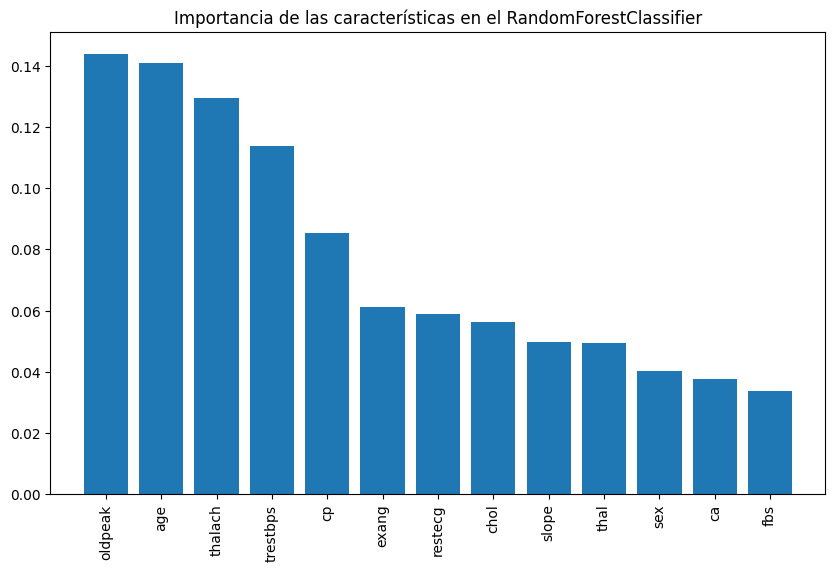

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end2_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end2_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end2_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end2_sin_label.shape[1]])
plt.show()


In [174]:
predicted_df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
732,0.369626,1.0,4.0,1.294872,1,0.0,2.0,-0.737374,1.0,2.019703,3.0,0.0,0.0,4.0
733,-0.162728,1.0,2.0,1.511971,1,0.0,0.0,1.092822,0.0,-0.832821,2.0,0.0,0.0,0.0
734,-0.588612,1.0,2.0,-1.744524,0,0.0,0.0,-1.493324,0.0,-0.832821,2.0,0.0,0.0,0.0
735,0.901980,1.0,4.0,-0.930400,0,0.0,0.0,-0.379292,1.0,1.544282,3.0,0.0,0.0,4.0
736,-0.269199,1.0,3.0,-1.201775,1,0.0,0.0,-0.578226,0.0,-0.262316,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1.0,4.0,3.682968,1,0.0,0.0,0.177724,1.0,1.068861,2.0,0.0,0.0,2.0
912,0.156684,1.0,2.0,-1.201775,2,1.0,1.0,1.689624,0.0,0.000000,2.0,0.0,0.0,0.0
913,1.434334,1.0,3.0,1.077772,2,0.0,2.0,0.496019,0.0,-0.072148,2.0,0.0,7.0,0.0
914,0.582567,1.0,1.0,2.054721,3,0.0,2.0,0.854100,0.0,-0.642653,2.0,0.0,7.0,0.0


In [175]:
predicted_df2['label'].value_counts()

0.0    87
2.0    34
1.0    29
3.0    29
4.0     5
Name: label, dtype: int64

In [176]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df2.reset_index(drop=True, inplace=True)
predicted_df2['ID'] = predicted_df2.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf2 = predicted_df2[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf2.to_csv('try14_data.csv', index=False)


## INTENTO 3

In [177]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [178]:
df3 = pd.read_csv('../df_cleaned.csv')

In [179]:
df3.drop(columns='Unnamed: 0',inplace=True)

In [180]:
df3

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54,1,4,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,NaN,NaN,NaN
912,180,55,1,2,110.0,214.0,1.0,1.0,180.0,0.0,NaN,NaN,NaN,NaN,NaN
913,181,67,1,3,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,NaN
914,182,59,1,1,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,NaN


In [181]:
df3.drop('index', axis=1, inplace=True)

In [182]:
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [183]:
media_thalach = df3['thalach'].mean()

# Rellenar los NaN con la media calculada
df3['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df3[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [184]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df3.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols3 = ['age', 'oldpeak']
categorical_cols3 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'label']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df3[numeric_cols3] = numeric_imputer3.fit_transform(df3[numeric_cols3])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df3[categorical_cols3] = categorical_imputer3.fit_transform(df3[categorical_cols3])

# Verificar que ya no hay valores faltantes
print(df3.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal        483
label         0
dtype: int64


In [185]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df3['chol'] = df3['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df3['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [186]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df3['thal'] = df3['thal'].apply(sust_thal)
print(df3['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [187]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df3['trestbps'] = df3['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df3['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [188]:
def categorizar_thalach(edad, sexo, thalach):
    if pd.isnull(thalach):
        return 0

    # Categorías basadas en la imagen para hombres y mujeres
    categorias_hombres = [(86, float('inf')), (70, 84), (62, 68), (60, float('inf'))]
    categorias_mujeres = [(96, float('inf')), (78, 94), (72, 76), (70, float('inf'))]
    
    # Seleccionar los límites según el sexo
    if sexo == 1:  # Hombres
        limites = categorias_hombres
    else:  # Mujeres
        limites = categorias_mujeres
    
    # Asignar categorías según la edad
    if edad < 30:
        rango = 0
    elif 30 <= edad <= 39:
        rango = 1
    elif 40 <= edad <= 49:
        rango = 2
    else:  # edad >= 50
        rango = 3
    
    # Determinar la categoría basada en el valor de thalach
    for i, (inferior, superior) in enumerate(limites):
        if i == rango:
            if thalach <= superior:
                return i + 1  # Devuelve un número de categoría basado en el índice
    return 5  # Devuelve una categoría para cualquier valor de thalach no clasificado anteriormente

# Aplicar la función actualizada al DataFrame
df3['thalach_cat'] = df3.apply(lambda fila: categorizar_thalach(fila['age'], fila['sex'], fila['thalach']), axis=1)

# Mostrar los primeros registros para verificar el resultado
print(df3[['age', 'sex', 'thalach', 'thalach_cat']].head())


    age  sex  thalach  thalach_cat
0  51.0  1.0    125.0            4
1  54.0  1.0    150.0            4
2  63.0  1.0    149.0            4
3  52.0  0.0    140.0            4
4  55.0  1.0    111.0            4


In [189]:
df3.isnull().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
label          0
thalach_cat    0
dtype: int64

In [190]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler3 = StandardScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df3[columns_to_scale3] = scaler3.fit_transform(df3[columns_to_scale3])


In [191]:
train_end3 = df3[0:732]
test_end3 = df3[(916-184):]

In [192]:
train_end3.isna().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
label          0
thalach_cat    0
dtype: int64

In [193]:
test_end3.isna().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
label          0
thalach_cat    0
dtype: int64

In [194]:
train_end3['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [195]:
from sklearn.model_selection import train_test_split

X3 = train_end3.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y3 = train_end3['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X3_train, X3_val, Y3_train, Y3_val = train_test_split(X3, Y3, test_size=0.125, random_state=42)



In [196]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote3 = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X3_train_smote, Y3_train_smote = smote3.fit_resample(X3_train, Y3_train)

# Ahora, X1_train_smote y Y1_train_smote son tus nuevas características y etiquetas de entrenamiento, respectivamente,
# con las clases minoritarias sobremuestreadas.


In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [198]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X3_train_smote, Y3_train_smote)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 3}, 0.7507042253521126)

In [199]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X3_train_smote, Y3_train_smote)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': 20, 'n_estimators': 100}, 0.7711267605633803)

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X3_train_smote, Y3_train_smote)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 10}, 0.5014084507042254)

In [201]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model3 = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model3.fit(X3_train_smote, Y3_train_smote)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=30, random_state=42)

In [202]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y3_val_pred = rf_model3.predict(X3_val)

# Calcular la precisión
accuracy = accuracy_score(Y3_val, Y3_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.5217391304347826


In [203]:
# Excluyendo la columna 'label'
test_end3_sin_label = test_end3.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones3 = rf_model3.predict(test_end3_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades3 = rf_model3.predict_proba(test_end3_sin_label)



In [204]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df3 = test_end3.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df3['label'] = predicciones3

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df3.head())



          age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  \
732  0.369626  1.0  4.0         3     1  0.0      2.0    119.0    1.0   
733 -0.162728  1.0  2.0         3     1  0.0      0.0    165.0    0.0   
734 -0.588612  1.0  2.0         1     0  0.0      0.0    100.0    0.0   
735  0.901980  1.0  4.0         1     0  0.0      0.0    128.0    1.0   
736 -0.269199  1.0  3.0         1     1  0.0      0.0    123.0    0.0   

      oldpeak  slope   ca  thal  label  thalach_cat  
732  2.019703    3.0  0.0   0.0    4.0            4  
733 -0.832821    2.0  0.0   0.0    0.0            4  
734 -0.832821    2.0  0.0   0.0    0.0            5  
735  1.544282    3.0  0.0   0.0    4.0            4  
736 -0.262316    1.0  0.0   3.0    0.0            4  


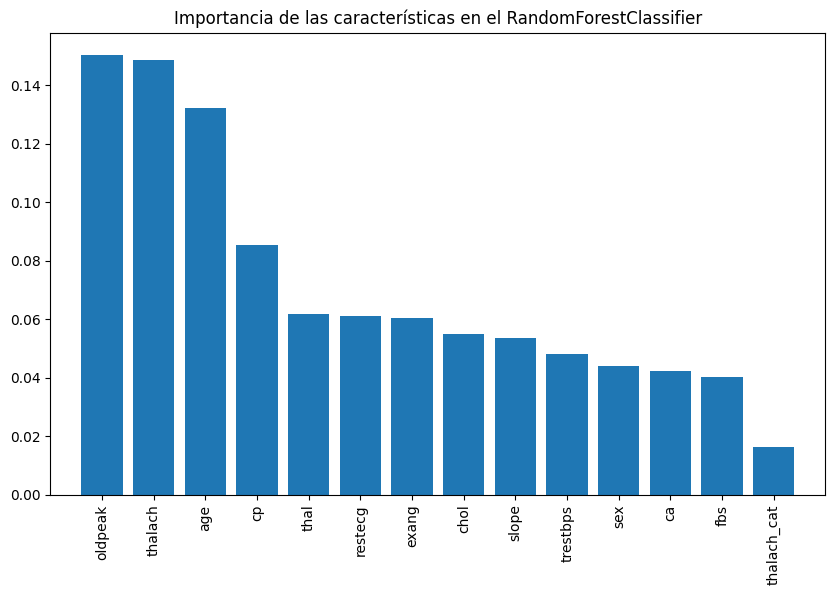

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model3.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end3_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end3_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end3_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end3_sin_label.shape[1]])
plt.show()


In [206]:
predicted_df3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat
732,0.369626,1.0,4.0,3,1,0.0,2.0,119.000000,1.0,2.019703,3.0,0.0,0.0,4.0,4
733,-0.162728,1.0,2.0,3,1,0.0,0.0,165.000000,0.0,-0.832821,2.0,0.0,0.0,0.0,4
734,-0.588612,1.0,2.0,1,0,0.0,0.0,100.000000,0.0,-0.832821,2.0,0.0,0.0,0.0,5
735,0.901980,1.0,4.0,1,0,0.0,0.0,128.000000,1.0,1.544282,3.0,0.0,0.0,4.0,4
736,-0.269199,1.0,3.0,1,1,0.0,0.0,123.000000,0.0,-0.262316,1.0,0.0,3.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1.0,4.0,3,1,0.0,0.0,142.000000,1.0,1.068861,2.0,0.0,0.0,2.0,4
912,0.156684,1.0,2.0,1,2,1.0,1.0,180.000000,0.0,0.000000,2.0,0.0,0.0,0.0,4
913,1.434334,1.0,3.0,3,2,0.0,2.0,150.000000,0.0,-0.072148,2.0,0.0,7.0,1.0,4
914,0.582567,1.0,1.0,3,3,0.0,2.0,159.000000,0.0,-0.642653,2.0,0.0,7.0,0.0,4


In [207]:
predicted_df3['label'].value_counts()

0.0    91
3.0    33
1.0    28
2.0    28
4.0     4
Name: label, dtype: int64

In [208]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df3.reset_index(drop=True, inplace=True)
predicted_df3['ID'] = predicted_df3.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df3[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try19_data.csv', index=False)


## INTENTO 4

In [209]:
df4 = pd.read_csv('../df_cleaned.csv')

In [210]:
df4.drop(columns='Unnamed: 0',inplace=True)

In [211]:
df4

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54,1,4,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,NaN,NaN,NaN
912,180,55,1,2,110.0,214.0,1.0,1.0,180.0,0.0,NaN,NaN,NaN,NaN,NaN
913,181,67,1,3,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,NaN
914,182,59,1,1,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,NaN


In [212]:
df4.drop('index', axis=1, inplace=True)

In [213]:
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [214]:
media_thalach = df4['thalach'].mean()

# Rellenar los NaN con la media calculada
df4['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df4[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [215]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df4.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['age', 'oldpeak']
categorical_cols4 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'label']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df4[numeric_cols4] = numeric_imputer3.fit_transform(df4[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df4[categorical_cols4] = categorical_imputer3.fit_transform(df4[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df4.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal        483
label         0
dtype: int64


In [216]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df4['chol'] = df4['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df4['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [217]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df4['thal'] = df4['thal'].apply(sust_thal)
print(df4['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [218]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df4['trestbps'] = df4['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df4['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [219]:
def categorizar_thalach_correcta(edad, sexo, thalach):
    # Categorías basadas en la tabla para hombres y mujeres
    # Los rangos se ajustan para reflejar el límite superior inclusivo
    categorias_hombres = [(86, 200), (70, 85), (62, 69), (60, 61)]  # Inadecuado, Normal, Bueno, Excelente
    categorias_mujeres = [(96, 200), (78, 95), (72, 77), (70, 71)]
    
    # Seleccionar los límites según el sexo
    limites = categorias_hombres if sexo == 1 else categorias_mujeres
    
    # Asignar categorías según la edad
    if edad < 30:
        rango_edad = 0
    elif edad <= 39:
        rango_edad = 1
    elif edad <= 49:
        rango_edad = 2
    else:  # edad >= 50
        rango_edad = 3
    
    # Verificar si thalach es NaN
    if pd.isnull(thalach):
        return 5  # Podemos asignar un 5 para valores NaN o no clasificables
    
    # Determinar la categoría basada en el valor de thalach
    # Devolveremos la categoría basada en el límite que se cruce primero, desde la mejor a la peor
    for i, (limite_inferior, limite_superior) in enumerate(limites):
        if limite_inferior <= thalach <= limite_superior:
            return 4 - i if rango_edad == i else 1  # Excelente si el rango de edad coincide, sino Inadecuado
    
    return 1  # Por defecto, si no encaja en ningún otro rango, se considera Inadecuado

# Aplicar la función actualizada al DataFrame
df4['thalach_cat'] = df4.apply(lambda fila: categorizar_thalach_correcta(fila['age'], fila['sex'], fila['thalach']), axis=1)

# Mostrar los primeros registros para verificar el resultado
print(df4[['age', 'sex', 'thalach', 'thalach_cat']].head())


    age  sex  thalach  thalach_cat
0  51.0  1.0    125.0            1
1  54.0  1.0    150.0            1
2  63.0  1.0    149.0            1
3  52.0  0.0    140.0            1
4  55.0  1.0    111.0            1


In [220]:
df4.isnull().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
label          0
thalach_cat    0
dtype: int64

In [221]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler3 = StandardScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df4[columns_to_scale3] = scaler3.fit_transform(df4[columns_to_scale3])


In [222]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "ca", "thal", "restecg"]

# Aplicar codificación ordinal
df4[ordinal_vars] = ordinal_encoder.fit_transform(df4[ordinal_vars])

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat
0,-0.269199,1.0,1.0,2,2,0.0,2.0,125.0,1.0,0.498357,0.0,1.0,1.0,0.0,1
1,0.050213,1.0,3.0,2,2,0.0,0.0,150.0,1.0,0.593441,1.0,0.0,3.0,2.0,1
2,1.008451,1.0,4.0,3,0,0.0,2.0,149.0,0.0,1.068861,0.0,0.0,0.0,2.0,1
3,-0.162728,0.0,2.0,3,0,0.0,0.0,140.0,0.0,-0.832821,1.0,0.0,0.0,0.0,1
4,0.156684,1.0,4.0,3,2,0.0,0.0,111.0,1.0,4.491890,2.0,0.0,3.0,3.0,1


In [223]:
# Aplicar codificación de conteo
for var in ["chol", "thalach_cat", "trestbps", "cp"]:
    df4[var + '_count'] = df4[var].map(df4[var].value_counts())

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
0,-0.269199,1.0,1.0,2,2,0.0,2.0,125.0,1.0,0.498357,0.0,1.0,1.0,0.0,1,230,913,211,44
1,0.050213,1.0,3.0,2,2,0.0,0.0,150.0,1.0,0.593441,1.0,0.0,3.0,2.0,1,230,913,211,204
2,1.008451,1.0,4.0,3,0,0.0,2.0,149.0,0.0,1.068861,0.0,0.0,0.0,2.0,1,201,913,485,495
3,-0.162728,0.0,2.0,3,0,0.0,0.0,140.0,0.0,-0.832821,1.0,0.0,0.0,0.0,1,201,913,485,173
4,0.156684,1.0,4.0,3,2,0.0,0.0,111.0,1.0,4.491890,2.0,0.0,3.0,3.0,1,230,913,485,495


In [224]:
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
0,-0.269199,1.0,1.0,2,2,0.0,2.0,125.000000,1.0,0.498357,0.0,1.0,1.0,0.0,1,230,913,211,44
1,0.050213,1.0,3.0,2,2,0.0,0.0,150.000000,1.0,0.593441,1.0,0.0,3.0,2.0,1,230,913,211,204
2,1.008451,1.0,4.0,3,0,0.0,2.0,149.000000,0.0,1.068861,0.0,0.0,0.0,2.0,1,201,913,485,495
3,-0.162728,0.0,2.0,3,0,0.0,0.0,140.000000,0.0,-0.832821,1.0,0.0,0.0,0.0,1,201,913,485,173
4,0.156684,1.0,4.0,3,2,0.0,0.0,111.000000,1.0,4.491890,2.0,0.0,3.0,3.0,1,230,913,485,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1.0,4.0,3,1,0.0,0.0,142.000000,1.0,1.068861,1.0,0.0,0.0,0.0,1,128,913,485,495
912,0.156684,1.0,2.0,1,2,1.0,1.0,180.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1,230,913,161,173
913,1.434334,1.0,3.0,3,2,0.0,2.0,150.000000,0.0,-0.072148,1.0,0.0,3.0,0.0,1,230,913,485,204
914,0.582567,1.0,1.0,3,3,0.0,2.0,159.000000,0.0,-0.642653,1.0,0.0,3.0,0.0,1,357,913,485,44


In [225]:
train_end4 = df4[0:732]
test_end4 = df4[(916-184):]

In [226]:
train_end4.isna().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
label                0
thalach_cat          0
chol_count           0
thalach_cat_count    0
trestbps_count       0
cp_count             0
dtype: int64

In [227]:
test_end4.isna().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
label                0
thalach_cat          0
chol_count           0
thalach_cat_count    0
trestbps_count       0
cp_count             0
dtype: int64

In [228]:
train_end4['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [229]:
from sklearn.model_selection import train_test_split

X4 = train_end4.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y4 = train_end4['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4, Y4, test_size=0.125, random_state=42)



In [230]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote3 = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X4_train_smote, Y4_train_smote = smote3.fit_resample(X4_train, Y4_train)

# Ahora, X1_train_smote y Y1_train_smote son tus nuevas características y etiquetas de entrenamiento, respectivamente,
# con las clases minoritarias sobremuestreadas.


In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [232]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X4_train_smote, Y4_train_smote)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 3}, 0.5992957746478872)

In [233]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X4_train_smote, Y4_train_smote)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': 30, 'n_estimators': 100}, 0.8112676056338028)

In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X4_train_smote, Y4_train_smote)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 1}, 0.3802816901408451)

In [235]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model4 = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model4.fit(X4_train_smote, Y4_train_smote)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=30, random_state=42)

In [236]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y4_val_pred = rf_model4.predict(X4_val)

# Calcular la precisión
accuracy = accuracy_score(Y4_val, Y4_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.4891304347826087


In [237]:
# Excluyendo la columna 'label'
test_end4_sin_label = test_end4.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model4.predict(test_end4_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model4.predict_proba(test_end4_sin_label)



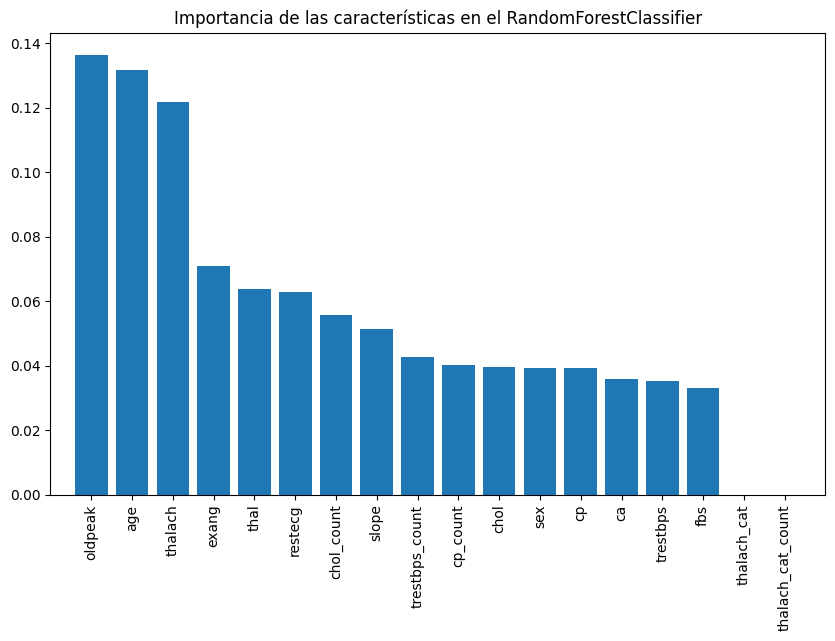

In [238]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model4.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end4_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end4_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end4_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end4_sin_label.shape[1]])
plt.show()


In [239]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df4 = test_end4.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df4['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df4.head())



          age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  \
732  0.369626  1.0  4.0         3     1  0.0      2.0    119.0    1.0   
733 -0.162728  1.0  2.0         3     1  0.0      0.0    165.0    0.0   
734 -0.588612  1.0  2.0         1     0  0.0      0.0    100.0    0.0   
735  0.901980  1.0  4.0         1     0  0.0      0.0    128.0    1.0   
736 -0.269199  1.0  3.0         1     1  0.0      0.0    123.0    0.0   

      oldpeak  slope   ca  thal  label  thalach_cat  chol_count  \
732  2.019703    2.0  0.0   0.0    2.0            1         128   
733 -0.832821    1.0  0.0   0.0    0.0            1         128   
734 -0.832821    1.0  0.0   0.0    0.0            1         201   
735  1.544282    2.0  0.0   0.0    3.0            1         201   
736 -0.262316    0.0  0.0   1.0    1.0            1         128   

     thalach_cat_count  trestbps_count  cp_count  
732                913             485       495  
733                913             485       173  
734  

In [240]:
predicted_df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
732,0.369626,1.0,4.0,3,1,0.0,2.0,119.000000,1.0,2.019703,2.0,0.0,0.0,2.0,1,128,913,485,495
733,-0.162728,1.0,2.0,3,1,0.0,0.0,165.000000,0.0,-0.832821,1.0,0.0,0.0,0.0,1,128,913,485,173
734,-0.588612,1.0,2.0,1,0,0.0,0.0,100.000000,0.0,-0.832821,1.0,0.0,0.0,0.0,1,201,913,161,173
735,0.901980,1.0,4.0,1,0,0.0,0.0,128.000000,1.0,1.544282,2.0,0.0,0.0,3.0,1,201,913,161,495
736,-0.269199,1.0,3.0,1,1,0.0,0.0,123.000000,0.0,-0.262316,0.0,0.0,1.0,1.0,1,128,913,161,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1.0,4.0,3,1,0.0,0.0,142.000000,1.0,1.068861,1.0,0.0,0.0,2.0,1,128,913,485,495
912,0.156684,1.0,2.0,1,2,1.0,1.0,180.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1,230,913,161,173
913,1.434334,1.0,3.0,3,2,0.0,2.0,150.000000,0.0,-0.072148,1.0,0.0,3.0,0.0,1,230,913,485,204
914,0.582567,1.0,1.0,3,3,0.0,2.0,159.000000,0.0,-0.642653,1.0,0.0,3.0,0.0,1,357,913,485,44


In [241]:
predicted_df4['label'].value_counts()

0.0    86
3.0    35
1.0    34
2.0    25
4.0     4
Name: label, dtype: int64

In [242]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df4.reset_index(drop=True, inplace=True)
predicted_df4['ID'] = predicted_df4.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df4[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try20_data.csv', index=False)


## INTENTO 5


In [ ]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [ ]:
df5 = pd.read_csv('../df_cleaned.csv')

In [1]:
df5.drop(columns='Unnamed: 0',inplace=True)

NameError: name 'df5' is not defined

In [ ]:
df5.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,916.000000,916.000000,916.00000,916.000000,857.000000,886.000000,827.000000,914.000000,861.000000,861.000000,854.000000,608.000000,308.000000,433.000000,732.000000
mean,310.460699,53.528384,0.78821,3.255459,132.142357,199.146727,0.165659,0.603939,137.533101,0.390244,0.875878,1.769737,0.678571,5.085450,1.132514
std,219.894251,9.397376,0.40880,0.925783,19.059506,110.762998,0.371999,0.805666,25.939337,0.488088,1.089846,0.617914,0.936378,1.920792,1.257615
min,0.000000,28.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,114.000000,47.000000,1.00000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,273.500000,54.000000,1.00000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,502.250000,60.000000,1.00000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,731.000000,77.000000,1.00000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df5.drop('index', axis=1, inplace=True)

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [ ]:
media_thalach = df5['thalach'].mean()

# Rellenar los NaN con la media calculada
df5['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df5[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [ ]:
print(df5[df5['oldpeak']< 0].value_counts(df5['oldpeak']))

oldpeak
-1.0    2
-0.5    2
-2.6    1
-2.0    1
-1.5    1
-1.1    1
-0.9    1
-0.8    1
-0.7    1
-0.1    1
dtype: int64


In [ ]:
df5['oldpeak'] = df5['oldpeak'].abs()

In [ ]:
print(df5[df5['oldpeak'] >= 0].value_counts(df5['oldpeak']))

oldpeak
0.0    369
1.0     85
2.0     77
1.5     49
3.0     27
0.5     21
1.2     17
2.5     16
0.8     16
1.4     15
1.6     14
0.6     14
0.2     14
1.8     12
0.1     10
0.4     10
4.0      8
2.6      8
2.8      7
1.3      5
1.1      5
1.9      5
0.3      5
0.9      5
2.2      5
0.7      5
2.4      4
3.6      4
3.4      3
4.2      2
3.5      2
2.1      2
3.2      2
1.7      2
3.1      1
2.9      1
3.7      1
3.8      1
2.3      1
4.4      1
5.0      1
5.6      1
6.2      1
dtype: int64


In [ ]:
df5.drop(columns='ca',inplace=True)

In [ ]:
print(df5.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          89
restecg       2
thalach       0
exang        55
oldpeak      62
slope       308
thal        483
label       184
dtype: int64


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df5.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['oldpeak']
categorical_cols4 = ['fbs', 'restecg', 'exang', 'slope',]

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df5[numeric_cols4] = numeric_imputer3.fit_transform(df5[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df5[categorical_cols4] = categorical_imputer3.fit_transform(df5[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df5.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal        483
label       184
dtype: int64


In [ ]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df5['chol'] = df5['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df5['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [ ]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df5['thal'] = df5['thal'].apply(sust_thal)
print(df5['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [ ]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df5['trestbps'] = df5['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df5['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [ ]:
df5.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal          0
label       184
dtype: int64

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
0,51,1,1,2,2,0.0,2.0,125.0,1.0,1.4,1.0,3.0,0.0
1,54,1,3,2,2,0.0,0.0,150.0,1.0,1.5,2.0,7.0,2.0
2,63,1,4,3,0,0.0,2.0,149.0,0.0,2.0,1.0,0.0,2.0
3,52,0,2,3,0,0.0,0.0,140.0,0.0,0.0,2.0,0.0,0.0
4,55,1,4,3,2,0.0,0.0,111.0,1.0,5.6,3.0,7.0,3.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler3 = StandardScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak', 'thalach']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df5[columns_to_scale3] = scaler3.fit_transform(df5[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "thal", "restecg"]

# Aplicar codificación ordinal
df5[ordinal_vars] = ordinal_encoder.fit_transform(df5[ordinal_vars])

df5.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
0,-0.269199,1,1,2,2,0.0,2.0,-0.498653,1.0,0.480939,0.0,1.0,0.0
1,0.050213,1,3,2,2,0.0,0.0,0.496019,1.0,0.578220,1.0,3.0,2.0
2,1.008451,1,4,3,0,0.0,2.0,0.456232,0.0,1.064627,0.0,0.0,2.0
3,-0.162728,0,2,3,0,0.0,0.0,0.098150,0.0,-0.881000,1.0,0.0,0.0
4,0.156684,1,4,3,2,0.0,0.0,-1.055669,1.0,4.566755,2.0,3.0,3.0


In [ ]:
# Aplicar codificación de conteo
for var in ["chol", "trestbps", "cp"]:
    df5[var + '_count'] = df5[var].map(df5[var].value_counts())

df5.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label,chol_count,trestbps_count,cp_count
0,-0.269199,1,1,2,2,0.0,2.0,-0.498653,1.0,0.480939,0.0,1.0,0.0,230,211,44
1,0.050213,1,3,2,2,0.0,0.0,0.496019,1.0,0.578220,1.0,3.0,2.0,230,211,204
2,1.008451,1,4,3,0,0.0,2.0,0.456232,0.0,1.064627,0.0,0.0,2.0,201,485,495
3,-0.162728,0,2,3,0,0.0,0.0,0.098150,0.0,-0.881000,1.0,0.0,0.0,201,485,173
4,0.156684,1,4,3,2,0.0,0.0,-1.055669,1.0,4.566755,2.0,3.0,3.0,230,485,495


In [ ]:
df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label,chol_count,trestbps_count,cp_count
0,-0.269199,1,1,2,2,0.0,2.0,-0.498653,1.0,0.480939,0.0,1.0,0.0,230,211,44
1,0.050213,1,3,2,2,0.0,0.0,0.496019,1.0,0.578220,1.0,3.0,2.0,230,211,204
2,1.008451,1,4,3,0,0.0,2.0,0.456232,0.0,1.064627,0.0,0.0,2.0,201,485,495
3,-0.162728,0,2,3,0,0.0,0.0,0.098150,0.0,-0.881000,1.0,0.0,0.0,201,485,173
4,0.156684,1,4,3,2,0.0,0.0,-1.055669,1.0,4.566755,2.0,3.0,3.0,230,485,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3,1,0.0,0.0,0.177724,1.0,1.064627,1.0,0.0,NaN,128,485,495
912,0.156684,1,2,1,2,1.0,1.0,1.689624,0.0,0.000000,1.0,0.0,NaN,230,161,173
913,1.434334,1,3,3,2,0.0,2.0,0.496019,0.0,-0.102749,1.0,3.0,NaN,230,485,204
914,0.582567,1,1,3,3,0.0,2.0,0.854100,0.0,-0.686437,1.0,3.0,NaN,357,485,44


In [ ]:
train_end5 = df5[0:732]
test_end5 = df5[(916-184):]

In [ ]:
train_end5.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
thal              0
label             0
chol_count        0
trestbps_count    0
cp_count          0
dtype: int64

In [ ]:
test_end5.isna().sum()

age                 0
sex                 0
cp                  0
trestbps            0
chol                0
fbs                 0
restecg             0
thalach             0
exang               0
oldpeak             0
slope               0
thal                0
label             184
chol_count          0
trestbps_count      0
cp_count            0
dtype: int64

In [ ]:
train_end5['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X5 = train_end5.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y5 = train_end5['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X5_train, X5_val, Y5_train, Y5_val = train_test_split(X5, Y5, test_size=0.125, random_state=42)



In [ ]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote3 = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X5_train_smote, Y5_train_smote = smote3.fit_resample(X5_train, Y5_train)

# Ahora, X1_train_smote y Y1_train_smote son tus nuevas características y etiquetas de entrenamiento, respectivamente,
# con las clases minoritarias sobremuestreadas.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X5_train_smote, Y5_train_smote)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 3}, 0.697887323943662)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X5_train_smote, Y5_train_smote)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': None, 'n_estimators': 100}, 0.8161971830985916)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X5_train_smote, Y5_train_smote)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 10}, 0.471830985915493)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model5 = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model5.fit(X5_train_smote, Y5_train_smote)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=30, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y5_val_pred = rf_model5.predict(X5_val)

# Calcular la precisión
accuracy = accuracy_score(Y5_val, Y5_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.45652173913043476


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(Y5_val, Y5_val_pred, average='micro')  

print(f"El F1-score del modelo en el conjunto de validación es: {f1}")


El F1-score del modelo en el conjunto de validación es: 0.45652173913043476


In [ ]:
# Excluyendo la columna 'label'
test_end5_sin_label = test_end5.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model5.predict(test_end5_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model5.predict_proba(test_end5_sin_label)



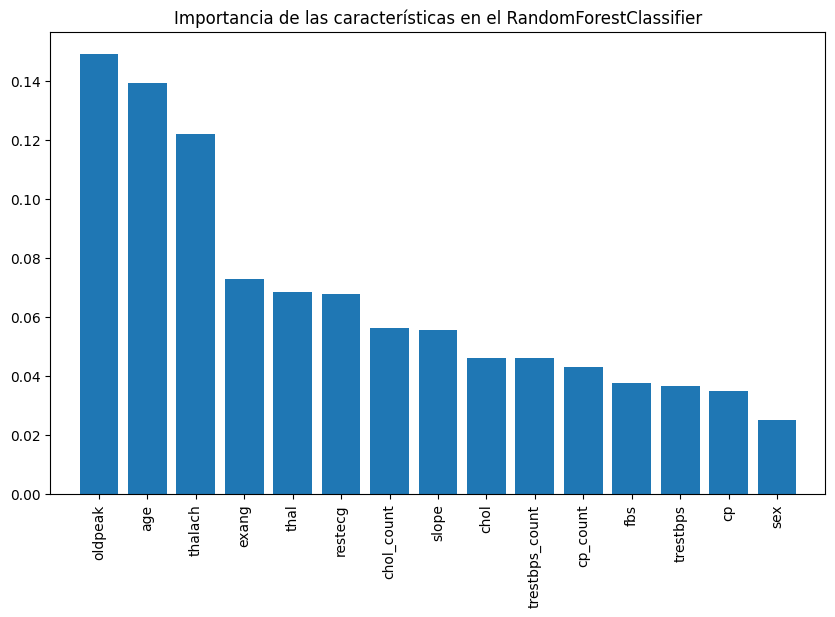

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model5.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end5_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end5_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end5_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end5_sin_label.shape[1]])
plt.show()


In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df5 = test_end5.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df5['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df5.head())



          age  sex  cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.369626    1   4         3     1  0.0      2.0 -0.737374    1.0   
733 -0.162728    1   2         3     1  0.0      0.0  1.092822    0.0   
734 -0.588612    1   2         1     0  0.0      0.0 -1.493324    0.0   
735  0.901980    1   4         1     0  0.0      0.0 -0.379292    1.0   
736 -0.269199    1   3         1     1  0.0      0.0 -0.578226    0.0   

      oldpeak  slope  thal  label  chol_count  trestbps_count  cp_count  
732  2.037440    2.0   0.0    2.0         128             485       495  
733 -0.881000    1.0   0.0    0.0         128             485       173  
734 -0.881000    1.0   0.0    0.0         201             161       173  
735  1.551034    2.0   0.0    3.0         201             161       495  
736 -0.297312    0.0   1.0    1.0         128             161       204  


In [ ]:
predicted_df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label,chol_count,trestbps_count,cp_count
732,0.369626,1,4,3,1,0.0,2.0,-0.737374,1.0,2.037440,2.0,0.0,2.0,128,485,495
733,-0.162728,1,2,3,1,0.0,0.0,1.092822,0.0,-0.881000,1.0,0.0,0.0,128,485,173
734,-0.588612,1,2,1,0,0.0,0.0,-1.493324,0.0,-0.881000,1.0,0.0,0.0,201,161,173
735,0.901980,1,4,1,0,0.0,0.0,-0.379292,1.0,1.551034,2.0,0.0,3.0,201,161,495
736,-0.269199,1,3,1,1,0.0,0.0,-0.578226,0.0,-0.297312,0.0,1.0,1.0,128,161,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3,1,0.0,0.0,0.177724,1.0,1.064627,1.0,0.0,2.0,128,485,495
912,0.156684,1,2,1,2,1.0,1.0,1.689624,0.0,0.000000,1.0,0.0,0.0,230,161,173
913,1.434334,1,3,3,2,0.0,2.0,0.496019,0.0,-0.102749,1.0,3.0,0.0,230,485,204
914,0.582567,1,1,3,3,0.0,2.0,0.854100,0.0,-0.686437,1.0,3.0,0.0,357,485,44


In [ ]:
predicted_df5['label'].value_counts()

0.0    90
2.0    32
3.0    31
1.0    28
4.0     3
Name: label, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df5.reset_index(drop=True, inplace=True)
predicted_df5['ID'] = predicted_df5.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df5[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try35_data.csv', index=False)


In [ ]:
dfactualtry = pd.read_csv('try35_data.csv')

In [ ]:
difference = dfbesttry['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
3     1.0    3.0
4     0.0    1.0
6     0.0    1.0
7     2.0    1.0
11    2.0    3.0
14    0.0    1.0
16    3.0    2.0
22    0.0    1.0
24    3.0    2.0
29    0.0    4.0
39    2.0    1.0
40    0.0    2.0
43    2.0    0.0
50    2.0    0.0
52    2.0    4.0
54    1.0    2.0
56    0.0    2.0
59    0.0    1.0
61    1.0    2.0
68    1.0    2.0
78    0.0    2.0
83    1.0    2.0
87    2.0    3.0
88    2.0    3.0
90    0.0    3.0
97    2.0    3.0
102   1.0    2.0
104   2.0    4.0
107   1.0    3.0
113   0.0    3.0
115   1.0    2.0
116   1.0    3.0
117   0.0    2.0
119   1.0    3.0
125   1.0    3.0
126   0.0    2.0
134   3.0    2.0
135   1.0    3.0
136   0.0    1.0
138   3.0    2.0
140   1.0    2.0
148   3.0    2.0
155   0.0    2.0
160   3.0    2.0
162   0.0    2.0
164   1.0    2.0
170   1.0    0.0


In [ ]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 47


: 

## INTENTO 6


In [ ]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [ ]:
df5 = pd.read_csv('../df_cleaned.csv')

In [ ]:
df5.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df5.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,916.000000,916.000000,916.00000,916.000000,857.000000,886.000000,827.000000,914.000000,861.000000,861.000000,854.000000,608.000000,308.000000,433.000000,732.000000
mean,310.460699,53.528384,0.78821,3.255459,132.142357,199.146727,0.165659,0.603939,137.533101,0.390244,0.875878,1.769737,0.678571,5.085450,1.132514
std,219.894251,9.397376,0.40880,0.925783,19.059506,110.762998,0.371999,0.805666,25.939337,0.488088,1.089846,0.617914,0.936378,1.920792,1.257615
min,0.000000,28.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,114.000000,47.000000,1.00000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,273.500000,54.000000,1.00000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,502.250000,60.000000,1.00000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,731.000000,77.000000,1.00000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df5.drop('index', axis=1, inplace=True)

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [ ]:
media_thalach = df5['thalach'].mean()

# Rellenar los NaN con la media calculada
df5['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df5[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [ ]:
print(df5[df5['oldpeak']< 0].value_counts(df5['oldpeak']))

oldpeak
-1.0    2
-0.5    2
-2.6    1
-2.0    1
-1.5    1
-1.1    1
-0.9    1
-0.8    1
-0.7    1
-0.1    1
dtype: int64


In [ ]:
df5['oldpeak'] = df5['oldpeak'].abs()

In [ ]:
print(df5[df5['oldpeak'] >= 0].value_counts(df5['oldpeak']))

oldpeak
0.0    369
1.0     85
2.0     77
1.5     49
3.0     27
0.5     21
1.2     17
2.5     16
0.8     16
1.4     15
1.6     14
0.6     14
0.2     14
1.8     12
0.1     10
0.4     10
4.0      8
2.6      8
2.8      7
1.3      5
1.1      5
1.9      5
0.3      5
0.9      5
2.2      5
0.7      5
2.4      4
3.6      4
3.4      3
4.2      2
3.5      2
2.1      2
3.2      2
1.7      2
3.1      1
2.9      1
3.7      1
3.8      1
2.3      1
4.4      1
5.0      1
5.6      1
6.2      1
dtype: int64


In [ ]:
df5.drop(columns='ca',inplace=True)

In [ ]:
print(df5.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          89
restecg       2
thalach       0
exang        55
oldpeak      62
slope       308
thal        483
label       184
dtype: int64


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df5.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['oldpeak']
categorical_cols4 = ['fbs', 'restecg', 'exang', 'slope']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df5[numeric_cols4] = numeric_imputer3.fit_transform(df5[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df5[categorical_cols4] = categorical_imputer3.fit_transform(df5[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df5.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal        483
label       184
dtype: int64


In [ ]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df5['chol'] = df5['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df5['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [ ]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df5['thal'] = df5['thal'].apply(sust_thal)
print(df5['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [ ]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df5['trestbps'] = df5['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df5['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [ ]:
df5.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal          0
label       184
dtype: int64

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
0,51,1,1,2,2,0.0,2.0,125.0,1.0,1.4,1.0,3.0,0.0
1,54,1,3,2,2,0.0,0.0,150.0,1.0,1.5,2.0,7.0,2.0
2,63,1,4,3,0,0.0,2.0,149.0,0.0,2.0,1.0,0.0,2.0
3,52,0,2,3,0,0.0,0.0,140.0,0.0,0.0,2.0,0.0,0.0
4,55,1,4,3,2,0.0,0.0,111.0,1.0,5.6,3.0,7.0,3.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler3 = StandardScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak', 'thalach']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df5[columns_to_scale3] = scaler3.fit_transform(df5[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "thal", "restecg"]

# Aplicar codificación ordinal
df5[ordinal_vars] = ordinal_encoder.fit_transform(df5[ordinal_vars])

df5.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
0,-0.269199,1,1,2,2,0.0,2.0,-0.498653,1.0,0.480939,0.0,1.0,0.0
1,0.050213,1,3,2,2,0.0,0.0,0.496019,1.0,0.578220,1.0,3.0,2.0
2,1.008451,1,4,3,0,0.0,2.0,0.456232,0.0,1.064627,0.0,0.0,2.0
3,-0.162728,0,2,3,0,0.0,0.0,0.098150,0.0,-0.881000,1.0,0.0,0.0
4,0.156684,1,4,3,2,0.0,0.0,-1.055669,1.0,4.566755,2.0,3.0,3.0


In [ ]:
df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
0,-0.269199,1,1,2,2,0.0,2.0,-0.498653,1.0,0.480939,0.0,1.0,0.0
1,0.050213,1,3,2,2,0.0,0.0,0.496019,1.0,0.578220,1.0,3.0,2.0
2,1.008451,1,4,3,0,0.0,2.0,0.456232,0.0,1.064627,0.0,0.0,2.0
3,-0.162728,0,2,3,0,0.0,0.0,0.098150,0.0,-0.881000,1.0,0.0,0.0
4,0.156684,1,4,3,2,0.0,0.0,-1.055669,1.0,4.566755,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3,1,0.0,0.0,0.177724,1.0,1.064627,1.0,0.0,NaN
912,0.156684,1,2,1,2,1.0,1.0,1.689624,0.0,0.000000,1.0,0.0,NaN
913,1.434334,1,3,3,2,0.0,2.0,0.496019,0.0,-0.102749,1.0,3.0,NaN
914,0.582567,1,1,3,3,0.0,2.0,0.854100,0.0,-0.686437,1.0,3.0,NaN


In [ ]:
train_end5 = df5[0:732]
test_end5 = df5[(916-184):]

In [ ]:
train_end5.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
label       0
dtype: int64

In [ ]:
test_end5.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal          0
label       184
dtype: int64

In [ ]:
train_end5['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X5 = train_end5.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y5 = train_end5['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X5_train, X5_val, Y5_train, Y5_val = train_test_split(X5, Y5, test_size=0.125, random_state=42)



In [ ]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote3 = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X5_train_smote, Y5_train_smote = smote3.fit_resample(X5_train, Y5_train)

# Ahora, X1_train_smote y Y1_train_smote son tus nuevas características y etiquetas de entrenamiento, respectivamente,
# con las clases minoritarias sobremuestreadas.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X5_train_smote, Y5_train_smote)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 3}, 0.7633802816901409)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X5_train_smote, Y5_train_smote)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': 20, 'n_estimators': 50}, 0.8147887323943662)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X5_train_smote, Y5_train_smote)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 10}, 0.476056338028169)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model5 = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model5.fit(X5_train_smote, Y5_train_smote)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=30, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y5_val_pred = rf_model5.predict(X5_val)

# Calcular la precisión
accuracy = accuracy_score(Y5_val, Y5_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.4782608695652174


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(Y5_val, Y5_val_pred, average='micro')  

print(f"El F1-score del modelo en el conjunto de validación es: {f1}")


El F1-score del modelo en el conjunto de validación es: 0.4782608695652174


In [ ]:
# Excluyendo la columna 'label'
test_end5_sin_label = test_end5.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model5.predict(test_end5_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model5.predict_proba(test_end5_sin_label)



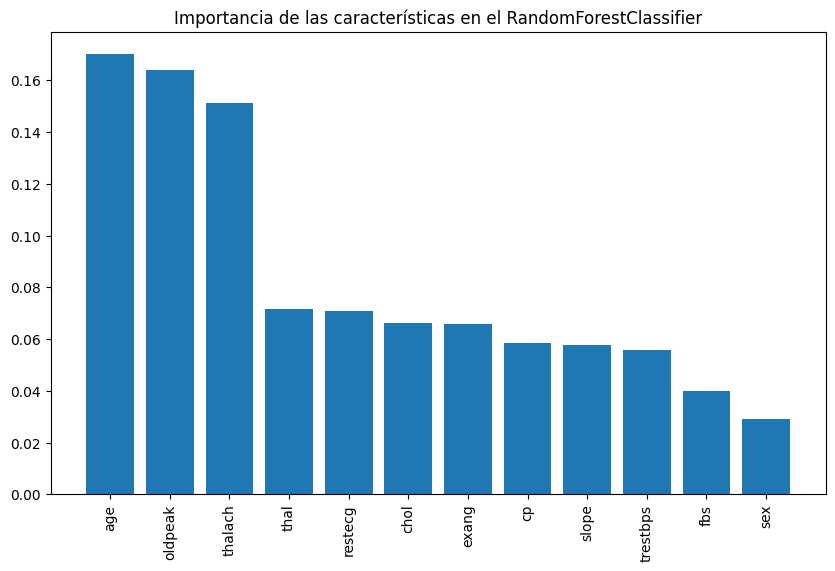

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model5.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end5_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end5_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end5_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end5_sin_label.shape[1]])
plt.show()


In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df5 = test_end5.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df5['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df5.head())



          age  sex  cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.369626    1   4         3     1  0.0      2.0 -0.737374    1.0   
733 -0.162728    1   2         3     1  0.0      0.0  1.092822    0.0   
734 -0.588612    1   2         1     0  0.0      0.0 -1.493324    0.0   
735  0.901980    1   4         1     0  0.0      0.0 -0.379292    1.0   
736 -0.269199    1   3         1     1  0.0      0.0 -0.578226    0.0   

      oldpeak  slope  thal  label  
732  2.037440    2.0   0.0    4.0  
733 -0.881000    1.0   0.0    0.0  
734 -0.881000    1.0   0.0    0.0  
735  1.551034    2.0   0.0    4.0  
736 -0.297312    0.0   1.0    1.0  


In [ ]:
predicted_df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
732,0.369626,1,4,3,1,0.0,2.0,-0.737374,1.0,2.037440,2.0,0.0,4.0
733,-0.162728,1,2,3,1,0.0,0.0,1.092822,0.0,-0.881000,1.0,0.0,0.0
734,-0.588612,1,2,1,0,0.0,0.0,-1.493324,0.0,-0.881000,1.0,0.0,0.0
735,0.901980,1,4,1,0,0.0,0.0,-0.379292,1.0,1.551034,2.0,0.0,4.0
736,-0.269199,1,3,1,1,0.0,0.0,-0.578226,0.0,-0.297312,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3,1,0.0,0.0,0.177724,1.0,1.064627,1.0,0.0,2.0
912,0.156684,1,2,1,2,1.0,1.0,1.689624,0.0,0.000000,1.0,0.0,0.0
913,1.434334,1,3,3,2,0.0,2.0,0.496019,0.0,-0.102749,1.0,3.0,0.0
914,0.582567,1,1,3,3,0.0,2.0,0.854100,0.0,-0.686437,1.0,3.0,0.0


In [ ]:
predicted_df5['label'].value_counts()

0.0    88
3.0    38
2.0    27
1.0    23
4.0     8
Name: label, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df5.reset_index(drop=True, inplace=True)
predicted_df5['ID'] = predicted_df5.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df5[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try36_data.csv', index=False)


In [ ]:
dfactualtry = pd.read_csv('try36_data.csv')

In [ ]:
difference = dfbesttry['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
0     2.0    4.0
3     1.0    4.0
4     0.0    1.0
6     0.0    1.0
7     2.0    1.0
14    0.0    1.0
20    1.0    4.0
21    1.0    3.0
22    0.0    1.0
29    0.0    4.0
31    0.0    3.0
39    2.0    0.0
40    0.0    2.0
43    2.0    3.0
46    3.0    1.0
52    2.0    4.0
53    1.0    3.0
54    1.0    2.0
56    0.0    2.0
57    1.0    2.0
59    0.0    1.0
61    1.0    3.0
62    1.0    2.0
68    1.0    2.0
78    0.0    2.0
83    1.0    2.0
85    1.0    3.0
87    2.0    3.0
90    0.0    3.0
97    2.0    3.0
98    1.0    0.0
99    2.0    3.0
104   2.0    4.0
107   1.0    3.0
109   0.0    1.0
112   1.0    3.0
113   0.0    3.0
115   1.0    2.0
116   1.0    3.0
117   0.0    4.0
119   1.0    3.0
125   1.0    3.0
126   0.0    2.0
138   3.0    2.0
140   1.0    2.0
142   0.0    3.0
148   3.0    2.0
150   1.0    2.0
160   3.0    2.0
164   1.0    3.0
166   3.0    4.0
172   0.0    1.0


In [ ]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 52


: 

## INTENTO 7


In [ ]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [ ]:
df5 = pd.read_csv('../df_cleaned.csv')

In [ ]:
df5.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df5.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,916.000000,916.000000,916.00000,916.000000,857.000000,886.000000,827.000000,914.000000,861.000000,861.000000,854.000000,608.000000,308.000000,433.000000,732.000000
mean,310.460699,53.528384,0.78821,3.255459,132.142357,199.146727,0.165659,0.603939,137.533101,0.390244,0.875878,1.769737,0.678571,5.085450,1.132514
std,219.894251,9.397376,0.40880,0.925783,19.059506,110.762998,0.371999,0.805666,25.939337,0.488088,1.089846,0.617914,0.936378,1.920792,1.257615
min,0.000000,28.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,114.000000,47.000000,1.00000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,273.500000,54.000000,1.00000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,502.250000,60.000000,1.00000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,731.000000,77.000000,1.00000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df5.drop('index', axis=1, inplace=True)

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [ ]:
media_thalach = df5['thalach'].mean()

# Rellenar los NaN con la media calculada
df5['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df5[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [ ]:
print(df5[df5['oldpeak']< 0].value_counts(df5['oldpeak']))

oldpeak
-1.0    2
-0.5    2
-2.6    1
-2.0    1
-1.5    1
-1.1    1
-0.9    1
-0.8    1
-0.7    1
-0.1    1
dtype: int64


In [ ]:
df5['oldpeak'] = df5['oldpeak'].abs()

In [ ]:
print(df5[df5['oldpeak'] >= 0].value_counts(df5['oldpeak']))

oldpeak
0.0    369
1.0     85
2.0     77
1.5     49
3.0     27
0.5     21
1.2     17
2.5     16
0.8     16
1.4     15
1.6     14
0.6     14
0.2     14
1.8     12
0.1     10
0.4     10
4.0      8
2.6      8
2.8      7
1.3      5
1.1      5
1.9      5
0.3      5
0.9      5
2.2      5
0.7      5
2.4      4
3.6      4
3.4      3
4.2      2
3.5      2
2.1      2
3.2      2
1.7      2
3.1      1
2.9      1
3.7      1
3.8      1
2.3      1
4.4      1
5.0      1
5.6      1
6.2      1
dtype: int64


In [ ]:
df5.drop(columns='ca',inplace=True)

In [ ]:
df5.drop(columns='slope', inplace=True)

In [ ]:
print(df5.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          89
restecg       2
thalach       0
exang        55
oldpeak      62
thal        483
label       184
dtype: int64


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df5.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['oldpeak']
categorical_cols4 = ['fbs', 'restecg', 'exang',]

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df5[numeric_cols4] = numeric_imputer3.fit_transform(df5[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df5[categorical_cols4] = categorical_imputer3.fit_transform(df5[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df5.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
thal        483
label       184
dtype: int64


In [ ]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df5['chol'] = df5['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df5['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [ ]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df5['thal'] = df5['thal'].apply(sust_thal)
print(df5['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [ ]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df5['trestbps'] = df5['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df5['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [ ]:
df5.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
thal          0
label       184
dtype: int64

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,label
0,51,1,1,2,2,0.0,2.0,125.0,1.0,1.4,3.0,0.0
1,54,1,3,2,2,0.0,0.0,150.0,1.0,1.5,7.0,2.0
2,63,1,4,3,0,0.0,2.0,149.0,0.0,2.0,0.0,2.0
3,52,0,2,3,0,0.0,0.0,140.0,0.0,0.0,0.0,0.0
4,55,1,4,3,2,0.0,0.0,111.0,1.0,5.6,7.0,3.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler3 = StandardScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak', 'thalach']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df5[columns_to_scale3] = scaler3.fit_transform(df5[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["thal", "restecg"]

# Aplicar codificación ordinal
df5[ordinal_vars] = ordinal_encoder.fit_transform(df5[ordinal_vars])

df5.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,label
0,-0.269199,1,1,2,2,0.0,2.0,-0.498653,1.0,0.480939,1.0,0.0
1,0.050213,1,3,2,2,0.0,0.0,0.496019,1.0,0.578220,3.0,2.0
2,1.008451,1,4,3,0,0.0,2.0,0.456232,0.0,1.064627,0.0,2.0
3,-0.162728,0,2,3,0,0.0,0.0,0.098150,0.0,-0.881000,0.0,0.0
4,0.156684,1,4,3,2,0.0,0.0,-1.055669,1.0,4.566755,3.0,3.0


In [ ]:
df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,label
0,-0.269199,1,1,2,2,0.0,2.0,-0.498653,1.0,0.480939,1.0,0.0
1,0.050213,1,3,2,2,0.0,0.0,0.496019,1.0,0.578220,3.0,2.0
2,1.008451,1,4,3,0,0.0,2.0,0.456232,0.0,1.064627,0.0,2.0
3,-0.162728,0,2,3,0,0.0,0.0,0.098150,0.0,-0.881000,0.0,0.0
4,0.156684,1,4,3,2,0.0,0.0,-1.055669,1.0,4.566755,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3,1,0.0,0.0,0.177724,1.0,1.064627,0.0,NaN
912,0.156684,1,2,1,2,1.0,1.0,1.689624,0.0,0.000000,0.0,NaN
913,1.434334,1,3,3,2,0.0,2.0,0.496019,0.0,-0.102749,3.0,NaN
914,0.582567,1,1,3,3,0.0,2.0,0.854100,0.0,-0.686437,3.0,NaN


In [ ]:
train_end5 = df5[0:732]
test_end5 = df5[(916-184):]

In [ ]:
train_end5.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
thal        0
label       0
dtype: int64

In [ ]:
test_end5.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
thal          0
label       184
dtype: int64

In [ ]:
train_end5['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X5 = train_end5.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y5 = train_end5['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X5_train, X5_val, Y5_train, Y5_val = train_test_split(X5, Y5, test_size=0.125, random_state=42)



In [ ]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote3 = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X5_train_smote, Y5_train_smote = smote3.fit_resample(X5_train, Y5_train)

# Ahora, X1_train_smote y Y1_train_smote son tus nuevas características y etiquetas de entrenamiento, respectivamente,
# con las clases minoritarias sobremuestreadas.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X5_train_smote, Y5_train_smote)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 3}, 0.782394366197183)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X5_train_smote, Y5_train_smote)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': 20, 'n_estimators': 100}, 0.8140845070422535)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X5_train_smote, Y5_train_smote)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 1}, 0.471830985915493)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model5 = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model5.fit(X5_train_smote, Y5_train_smote)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y5_val_pred = rf_model5.predict(X5_val)

# Calcular la precisión
accuracy = accuracy_score(Y5_val, Y5_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.4673913043478261


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(Y5_val, Y5_val_pred, average='micro')  

print(f"El F1-score del modelo en el conjunto de validación es: {f1}")


El F1-score del modelo en el conjunto de validación es: 0.4673913043478261


In [ ]:
# Excluyendo la columna 'label'
test_end5_sin_label = test_end5.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model5.predict(test_end5_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model5.predict_proba(test_end5_sin_label)



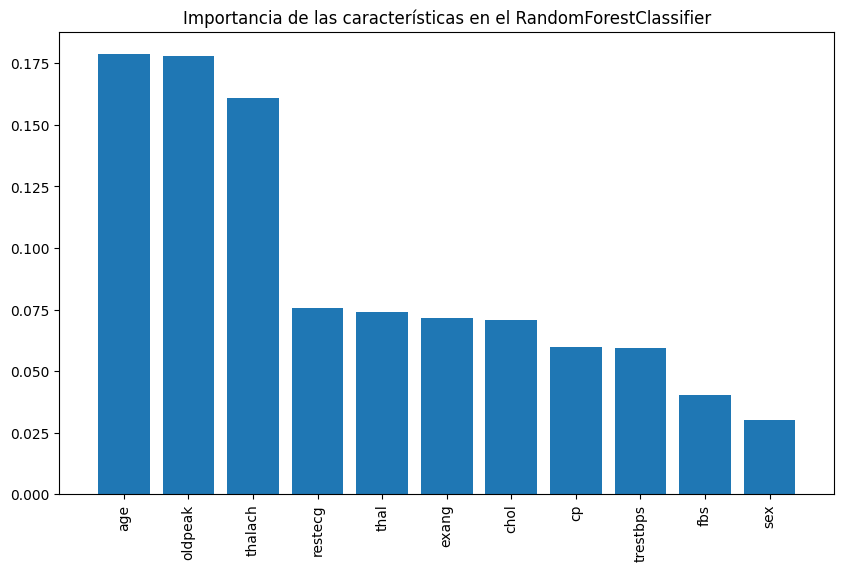

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model5.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end5_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end5_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end5_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end5_sin_label.shape[1]])
plt.show()


In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df5 = test_end5.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df5['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df5.head())



          age  sex  cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.369626    1   4         3     1  0.0      2.0 -0.737374    1.0   
733 -0.162728    1   2         3     1  0.0      0.0  1.092822    0.0   
734 -0.588612    1   2         1     0  0.0      0.0 -1.493324    0.0   
735  0.901980    1   4         1     0  0.0      0.0 -0.379292    1.0   
736 -0.269199    1   3         1     1  0.0      0.0 -0.578226    0.0   

      oldpeak  thal  label  
732  2.037440   0.0    4.0  
733 -0.881000   0.0    0.0  
734 -0.881000   0.0    0.0  
735  1.551034   0.0    2.0  
736 -0.297312   1.0    0.0  


In [ ]:
predicted_df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,label
732,0.369626,1,4,3,1,0.0,2.0,-0.737374,1.0,2.037440,0.0,4.0
733,-0.162728,1,2,3,1,0.0,0.0,1.092822,0.0,-0.881000,0.0,0.0
734,-0.588612,1,2,1,0,0.0,0.0,-1.493324,0.0,-0.881000,0.0,0.0
735,0.901980,1,4,1,0,0.0,0.0,-0.379292,1.0,1.551034,0.0,2.0
736,-0.269199,1,3,1,1,0.0,0.0,-0.578226,0.0,-0.297312,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3,1,0.0,0.0,0.177724,1.0,1.064627,0.0,2.0
912,0.156684,1,2,1,2,1.0,1.0,1.689624,0.0,0.000000,0.0,0.0
913,1.434334,1,3,3,2,0.0,2.0,0.496019,0.0,-0.102749,3.0,0.0
914,0.582567,1,1,3,3,0.0,2.0,0.854100,0.0,-0.686437,3.0,0.0


In [ ]:
predicted_df5['label'].value_counts()

0.0    88
3.0    38
1.0    26
2.0    25
4.0     7
Name: label, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df5.reset_index(drop=True, inplace=True)
predicted_df5['ID'] = predicted_df5.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df5[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try37_data.csv', index=False)


In [ ]:
dfactualtry = pd.read_csv('try37_data.csv')

In [ ]:
difference = dfbesttry['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
0     2.0    4.0
3     1.0    2.0
6     0.0    1.0
7     2.0    1.0
14    0.0    2.0
20    1.0    4.0
22    0.0    1.0
29    0.0    4.0
31    0.0    3.0
39    2.0    1.0
40    0.0    2.0
43    2.0    0.0
52    2.0    4.0
53    1.0    3.0
54    1.0    2.0
56    0.0    2.0
57    1.0    2.0
59    0.0    1.0
60    2.0    3.0
61    1.0    3.0
68    1.0    2.0
73    3.0    4.0
78    0.0    3.0
87    2.0    3.0
88    2.0    1.0
90    0.0    3.0
94    0.0    3.0
97    2.0    3.0
98    1.0    0.0
99    2.0    3.0
102   1.0    3.0
104   2.0    4.0
112   1.0    3.0
113   0.0    3.0
115   1.0    3.0
116   1.0    3.0
119   1.0    3.0
125   1.0    3.0
126   0.0    2.0
138   3.0    2.0
140   1.0    2.0
142   0.0    3.0
148   3.0    1.0
150   1.0    2.0
151   0.0    2.0
153   3.0    2.0
154   3.0    1.0
160   3.0    2.0
164   1.0    3.0
166   3.0    4.0
168   0.0    1.0
170   1.0    0.0
172   0.0    1.0
175   2.0    3.0
178   0.0    2.0
183   1.0    2.0


In [ ]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 56


: 

## INTENTO 8


In [ ]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [ ]:
df5 = pd.read_csv('../df_cleaned.csv')

In [ ]:
df5.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df5.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,916.000000,916.000000,916.00000,916.000000,857.000000,886.000000,827.000000,914.000000,861.000000,861.000000,854.000000,608.000000,308.000000,433.000000,732.000000
mean,310.460699,53.528384,0.78821,3.255459,132.142357,199.146727,0.165659,0.603939,137.533101,0.390244,0.875878,1.769737,0.678571,5.085450,1.132514
std,219.894251,9.397376,0.40880,0.925783,19.059506,110.762998,0.371999,0.805666,25.939337,0.488088,1.089846,0.617914,0.936378,1.920792,1.257615
min,0.000000,28.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,114.000000,47.000000,1.00000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,273.500000,54.000000,1.00000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,502.250000,60.000000,1.00000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,731.000000,77.000000,1.00000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df5.drop('index', axis=1, inplace=True)

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [ ]:
media_thalach = df5['thalach'].mean()

# Rellenar los NaN con la media calculada
df5['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df5[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [ ]:
print(df5[df5['oldpeak']< 0].value_counts(df5['oldpeak']))

oldpeak
-1.0    2
-0.5    2
-2.6    1
-2.0    1
-1.5    1
-1.1    1
-0.9    1
-0.8    1
-0.7    1
-0.1    1
dtype: int64


In [ ]:
df5['oldpeak'] = df5['oldpeak'].abs()

In [ ]:
print(df5[df5['oldpeak'] >= 0].value_counts(df5['oldpeak']))

oldpeak
0.0    369
1.0     85
2.0     77
1.5     49
3.0     27
0.5     21
1.2     17
2.5     16
0.8     16
1.4     15
1.6     14
0.6     14
0.2     14
1.8     12
0.1     10
0.4     10
4.0      8
2.6      8
2.8      7
1.3      5
1.1      5
1.9      5
0.3      5
0.9      5
2.2      5
0.7      5
2.4      4
3.6      4
3.4      3
4.2      2
3.5      2
2.1      2
3.2      2
1.7      2
3.1      1
2.9      1
3.7      1
3.8      1
2.3      1
4.4      1
5.0      1
5.6      1
6.2      1
dtype: int64


In [ ]:
df5.drop(columns='ca',inplace=True)

In [ ]:
df5.drop(columns='slope', inplace=True)

In [ ]:
print(df5.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          89
restecg       2
thalach       0
exang        55
oldpeak      62
thal        483
label       184
dtype: int64


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df5.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['oldpeak', 'chol', 'trestbps']
categorical_cols4 = ['fbs', 'restecg', 'exang',]

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df5[numeric_cols4] = numeric_imputer3.fit_transform(df5[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df5[categorical_cols4] = categorical_imputer3.fit_transform(df5[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df5.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
thal        483
label       184
dtype: int64


In [ ]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df5['thal'] = df5['thal'].apply(sust_thal)
print(df5['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [ ]:
df5.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
thal          0
label       184
dtype: int64

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,label
0,51,1,1,125.0,213.000000,0.0,2.0,125.0,1.0,1.4,3.0,0.0
1,54,1,3,120.0,237.000000,0.0,0.0,150.0,1.0,1.5,7.0,2.0
2,63,1,4,140.0,0.000000,0.0,2.0,149.0,0.0,2.0,0.0,2.0
3,52,0,2,140.0,199.146727,0.0,0.0,140.0,0.0,0.0,0.0,0.0
4,55,1,4,140.0,217.000000,0.0,0.0,111.0,1.0,5.6,7.0,3.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler3 = StandardScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak', 'thalach','chol','trestbps']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df5[columns_to_scale3] = scaler3.fit_transform(df5[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["thal", "restecg"]

# Aplicar codificación ordinal
df5[ordinal_vars] = ordinal_encoder.fit_transform(df5[ordinal_vars])

df5.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,label
0,-0.269199,1,1,-0.387651,0.127243,0.0,2.0,-0.498653,1.0,0.480939,1.0,0.0
1,0.050213,1,3,-0.659026,0.347684,0.0,0.0,0.496019,1.0,0.578220,3.0,2.0
2,1.008451,1,4,0.426473,-1.829172,0.0,2.0,0.456232,0.0,1.064627,0.0,2.0
3,-0.162728,0,2,0.426473,0.000000,0.0,0.0,0.098150,0.0,-0.881000,0.0,0.0
4,0.156684,1,4,0.426473,0.163983,0.0,0.0,-1.055669,1.0,4.566755,3.0,3.0


In [ ]:
df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,label
0,-0.269199,1,1,-0.387651,0.127243,0.0,2.0,-0.498653,1.0,0.480939,1.0,0.0
1,0.050213,1,3,-0.659026,0.347684,0.0,0.0,0.496019,1.0,0.578220,3.0,2.0
2,1.008451,1,4,0.426473,-1.829172,0.0,2.0,0.456232,0.0,1.064627,0.0,2.0
3,-0.162728,0,2,0.426473,0.000000,0.0,0.0,0.098150,0.0,-0.881000,0.0,0.0
4,0.156684,1,4,0.426473,0.163983,0.0,0.0,-1.055669,1.0,4.566755,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3.682968,-0.010533,0.0,0.0,0.177724,1.0,1.064627,0.0,NaN
912,0.156684,1,2,-1.201775,0.136428,1.0,1.0,1.689624,0.0,0.000000,0.0,NaN
913,1.434334,1,3,1.077772,0.118058,0.0,2.0,0.496019,0.0,-0.102749,3.0,NaN
914,0.582567,1,1,2.054721,0.816122,0.0,2.0,0.854100,0.0,-0.686437,3.0,NaN


In [ ]:
train_end5 = df5[0:732]
test_end5 = df5[(916-184):]

In [ ]:
train_end5.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
thal        0
label       0
dtype: int64

In [ ]:
test_end5.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
thal          0
label       184
dtype: int64

In [ ]:
train_end5['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X5 = train_end5.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y5 = train_end5['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X5_train, X5_val, Y5_train, Y5_val = train_test_split(X5, Y5, test_size=0.125, random_state=42)



In [ ]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote3 = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X5_train_smote, Y5_train_smote = smote3.fit_resample(X5_train, Y5_train)

# Ahora, X1_train_smote y Y1_train_smote son tus nuevas características y etiquetas de entrenamiento, respectivamente,
# con las clases minoritarias sobremuestreadas.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X5_train_smote, Y5_train_smote)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 3}, 0.7873239436619718)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X5_train_smote, Y5_train_smote)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': 30, 'n_estimators': 50}, 0.819718309859155)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X5_train_smote, Y5_train_smote)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


({'C': 0.1}, 0.4598591549295775)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model5 = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model5.fit(X5_train_smote, Y5_train_smote)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y5_val_pred = rf_model5.predict(X5_val)

# Calcular la precisión
accuracy = accuracy_score(Y5_val, Y5_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.532608695652174


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(Y5_val, Y5_val_pred, average='micro')  

print(f"El F1-score del modelo en el conjunto de validación es: {f1}")


El F1-score del modelo en el conjunto de validación es: 0.532608695652174


In [ ]:
# Excluyendo la columna 'label'
test_end5_sin_label = test_end5.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model5.predict(test_end5_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model5.predict_proba(test_end5_sin_label)



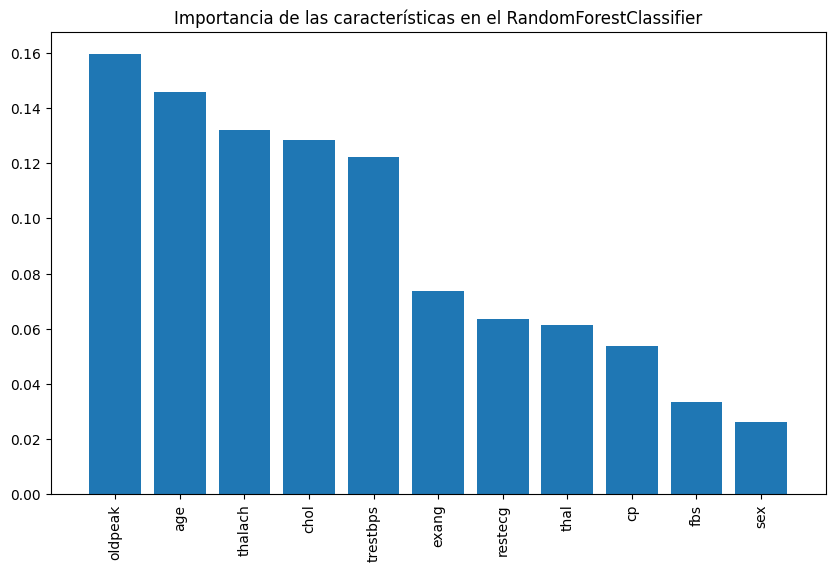

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model5.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end5_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end5_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end5_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end5_sin_label.shape[1]])
plt.show()


In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df5 = test_end5.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df5['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df5.head())



          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
732  0.369626    1   4  1.294872 -0.240159  0.0      2.0 -0.737374    1.0   
733 -0.162728    1   2  1.511971 -0.028903  0.0      0.0  1.092822    0.0   
734 -0.588612    1   2 -1.744524  0.000000  0.0      0.0 -1.493324    0.0   
735  0.901980    1   4 -0.930400 -1.829172  0.0      0.0 -0.379292    1.0   
736 -0.269199    1   3 -1.201775 -0.221789  0.0      0.0 -0.578226    0.0   

      oldpeak  thal  label  
732  2.037440   0.0    2.0  
733 -0.881000   0.0    0.0  
734 -0.881000   0.0    0.0  
735  1.551034   0.0    2.0  
736 -0.297312   1.0    1.0  


In [ ]:
predicted_df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,label
732,0.369626,1,4,1.294872,-0.240159,0.0,2.0,-0.737374,1.0,2.037440,0.0,2.0
733,-0.162728,1,2,1.511971,-0.028903,0.0,0.0,1.092822,0.0,-0.881000,0.0,0.0
734,-0.588612,1,2,-1.744524,0.000000,0.0,0.0,-1.493324,0.0,-0.881000,0.0,0.0
735,0.901980,1,4,-0.930400,-1.829172,0.0,0.0,-0.379292,1.0,1.551034,0.0,2.0
736,-0.269199,1,3,-1.201775,-0.221789,0.0,0.0,-0.578226,0.0,-0.297312,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3.682968,-0.010533,0.0,0.0,0.177724,1.0,1.064627,0.0,3.0
912,0.156684,1,2,-1.201775,0.136428,1.0,1.0,1.689624,0.0,0.000000,0.0,0.0
913,1.434334,1,3,1.077772,0.118058,0.0,2.0,0.496019,0.0,-0.102749,3.0,0.0
914,0.582567,1,1,2.054721,0.816122,0.0,2.0,0.854100,0.0,-0.686437,3.0,0.0


In [ ]:
predicted_df5['label'].value_counts()

0.0    85
1.0    33
3.0    32
2.0    31
4.0     3
Name: label, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df5.reset_index(drop=True, inplace=True)
predicted_df5['ID'] = predicted_df5.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df5[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try39_data.csv', index=False)


In [ ]:
dfactualtry = pd.read_csv('try39_data.csv')

In [ ]:
difference = dfbesttry['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
3     1.0    2.0
4     0.0    1.0
6     0.0    1.0
7     2.0    1.0
8     3.0    1.0
11    2.0    3.0
14    0.0    1.0
16    3.0    2.0
22    0.0    1.0
27    3.0    2.0
29    0.0    4.0
39    2.0    0.0
40    0.0    1.0
46    3.0    1.0
47    0.0    3.0
52    2.0    1.0
53    1.0    3.0
54    1.0    2.0
56    0.0    1.0
57    1.0    2.0
59    0.0    1.0
60    2.0    1.0
61    1.0    2.0
62    1.0    2.0
68    1.0    2.0
83    1.0    2.0
85    1.0    0.0
88    2.0    3.0
94    0.0    2.0
95    3.0    2.0
97    2.0    3.0
98    1.0    0.0
99    2.0    3.0
101   1.0    2.0
106   0.0    4.0
113   0.0    3.0
115   1.0    3.0
116   1.0    3.0
117   0.0    4.0
126   0.0    1.0
130   0.0    2.0
140   1.0    2.0
142   0.0    3.0
143   0.0    2.0
148   3.0    2.0
149   3.0    2.0
151   0.0    3.0
154   3.0    1.0
155   0.0    2.0
158   2.0    3.0
164   1.0    3.0
168   0.0    3.0
172   0.0    1.0
177   1.0    2.0
179   2.0    3.0
183   1.0    2.0


In [ ]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 56


: 

## INTENTO 9


In [ ]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [ ]:
df5 = pd.read_csv('../df_cleaned.csv')

In [ ]:
df5.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df5.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,916.000000,916.000000,916.00000,916.000000,857.000000,886.000000,827.000000,914.000000,861.000000,861.000000,854.000000,608.000000,308.000000,433.000000,732.000000
mean,310.460699,53.528384,0.78821,3.255459,132.142357,199.146727,0.165659,0.603939,137.533101,0.390244,0.875878,1.769737,0.678571,5.085450,1.132514
std,219.894251,9.397376,0.40880,0.925783,19.059506,110.762998,0.371999,0.805666,25.939337,0.488088,1.089846,0.617914,0.936378,1.920792,1.257615
min,0.000000,28.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,114.000000,47.000000,1.00000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,273.500000,54.000000,1.00000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,502.250000,60.000000,1.00000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,731.000000,77.000000,1.00000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df5.drop('index', axis=1, inplace=True)

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [ ]:
media_thalach = df5['thalach'].mean()

# Rellenar los NaN con la media calculada
df5['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df5[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [ ]:
print(df5[df5['oldpeak']< 0].value_counts(df5['oldpeak']))

oldpeak
-1.0    2
-0.5    2
-2.6    1
-2.0    1
-1.5    1
-1.1    1
-0.9    1
-0.8    1
-0.7    1
-0.1    1
dtype: int64


In [ ]:
df5['oldpeak'] = df5['oldpeak'].abs()

In [ ]:
print(df5[df5['oldpeak'] >= 0].value_counts(df5['oldpeak']))

oldpeak
0.0    369
1.0     85
2.0     77
1.5     49
3.0     27
0.5     21
1.2     17
2.5     16
0.8     16
1.4     15
1.6     14
0.6     14
0.2     14
1.8     12
0.1     10
0.4     10
4.0      8
2.6      8
2.8      7
1.3      5
1.1      5
1.9      5
0.3      5
0.9      5
2.2      5
0.7      5
2.4      4
3.6      4
3.4      3
4.2      2
3.5      2
2.1      2
3.2      2
1.7      2
3.1      1
2.9      1
3.7      1
3.8      1
2.3      1
4.4      1
5.0      1
5.6      1
6.2      1
dtype: int64


In [ ]:
df5.drop(columns='ca',inplace=True)

In [ ]:
df5.drop(columns='slope', inplace=True)

In [ ]:
df5.drop(columns='chol', inplace=True)

In [ ]:
df5.drop(columns='thal', inplace=True)

In [ ]:
print(df5.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
fbs          89
restecg       2
thalach       0
exang        55
oldpeak      62
label       184
dtype: int64


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df5.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['oldpeak','trestbps']
categorical_cols4 = ['fbs', 'restecg', 'exang',]

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df5[numeric_cols4] = numeric_imputer3.fit_transform(df5[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df5[categorical_cols4] = categorical_imputer3.fit_transform(df5[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df5.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps      0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
label       184
dtype: int64


In [ ]:
df5.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
label       184
dtype: int64

In [ ]:
df5.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,label
0,51,1,1,125.0,0.0,2.0,125.0,1.0,1.4,0.0
1,54,1,3,120.0,0.0,0.0,150.0,1.0,1.5,2.0
2,63,1,4,140.0,0.0,2.0,149.0,0.0,2.0,2.0
3,52,0,2,140.0,0.0,0.0,140.0,0.0,0.0,0.0
4,55,1,4,140.0,0.0,0.0,111.0,1.0,5.6,3.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler3 = StandardScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak', 'thalach','trestbps']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df5[columns_to_scale3] = scaler3.fit_transform(df5[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["restecg"]

# Aplicar codificación ordinal
df5[ordinal_vars] = ordinal_encoder.fit_transform(df5[ordinal_vars])

df5.head()


,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,label
0,-0.269199,1,1,-0.387651,0.0,2.0,-0.498653,1.0,0.480939,0.0
1,0.050213,1,3,-0.659026,0.0,0.0,0.496019,1.0,0.578220,2.0
2,1.008451,1,4,0.426473,0.0,2.0,0.456232,0.0,1.064627,2.0
3,-0.162728,0,2,0.426473,0.0,0.0,0.098150,0.0,-0.881000,0.0
4,0.156684,1,4,0.426473,0.0,0.0,-1.055669,1.0,4.566755,3.0


In [ ]:
df5

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,label
0,-0.269199,1,1,-0.387651,0.0,2.0,-0.498653,1.0,0.480939,0.0
1,0.050213,1,3,-0.659026,0.0,0.0,0.496019,1.0,0.578220,2.0
2,1.008451,1,4,0.426473,0.0,2.0,0.456232,0.0,1.064627,2.0
3,-0.162728,0,2,0.426473,0.0,0.0,0.098150,0.0,-0.881000,0.0
4,0.156684,1,4,0.426473,0.0,0.0,-1.055669,1.0,4.566755,3.0
...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3.682968,0.0,0.0,0.177724,1.0,1.064627,NaN
912,0.156684,1,2,-1.201775,1.0,1.0,1.689624,0.0,0.000000,NaN
913,1.434334,1,3,1.077772,0.0,2.0,0.496019,0.0,-0.102749,NaN
914,0.582567,1,1,2.054721,0.0,2.0,0.854100,0.0,-0.686437,NaN


In [ ]:
train_end5 = df5[0:732]
test_end5 = df5[(916-184):]

In [ ]:
train_end5.isna().sum()

age         0
sex         0
cp          0
trestbps    0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
label       0
dtype: int64

In [ ]:
test_end5.isna().sum()

age           0
sex           0
cp            0
trestbps      0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
label       184
dtype: int64

In [ ]:
train_end5['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X5 = train_end5.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y5 = train_end5['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X5_train, X5_val, Y5_train, Y5_val = train_test_split(X5, Y5, test_size=0.125, random_state=42)



In [ ]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote3 = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X5_train_smote, Y5_train_smote = smote3.fit_resample(X5_train, Y5_train)

# Ahora, X1_train_smote y Y1_train_smote son tus nuevas características y etiquetas de entrenamiento, respectivamente,
# con las clases minoritarias sobremuestreadas.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X5_train_smote, Y5_train_smote)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 3}, 0.7838028169014084)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X5_train_smote, Y5_train_smote)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': 20, 'n_estimators': 100}, 0.8211267605633802)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X5_train_smote, Y5_train_smote)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


({'C': 1}, 0.4584507042253521)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model5 = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model5.fit(X5_train_smote, Y5_train_smote)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y5_val_pred = rf_model5.predict(X5_val)

# Calcular la precisión
accuracy = accuracy_score(Y5_val, Y5_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.45652173913043476


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(Y5_val, Y5_val_pred, average='micro')  

print(f"El F1-score del modelo en el conjunto de validación es: {f1}")


El F1-score del modelo en el conjunto de validación es: 0.45652173913043476


In [ ]:
# Excluyendo la columna 'label'
test_end5_sin_label = test_end5.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model5.predict(test_end5_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model5.predict_proba(test_end5_sin_label)



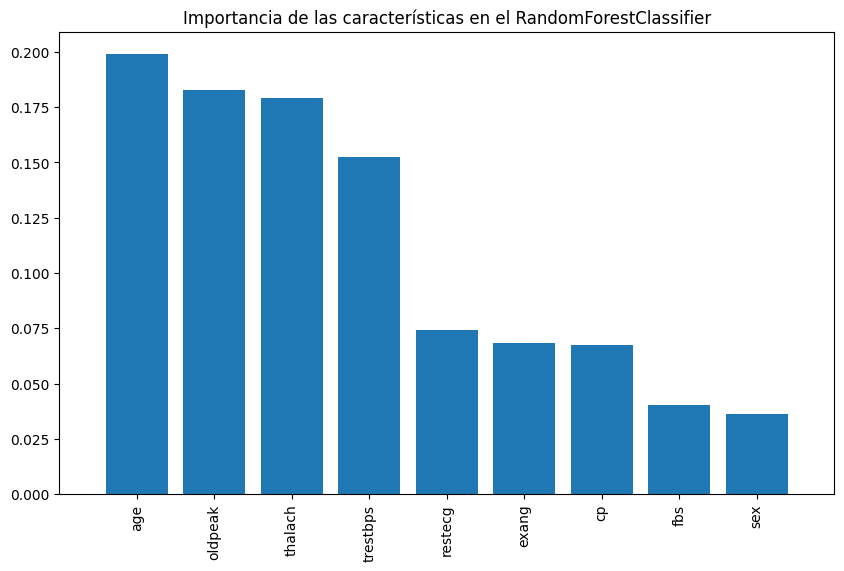

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model5.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end5_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end5_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end5_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end5_sin_label.shape[1]])
plt.show()


In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df5 = test_end5.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df5['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df5.head())



          age  sex  cp  trestbps  fbs  restecg   thalach  exang   oldpeak  \
732  0.369626    1   4  1.294872  0.0      2.0 -0.737374    1.0  2.037440   
733 -0.162728    1   2  1.511971  0.0      0.0  1.092822    0.0 -0.881000   
734 -0.588612    1   2 -1.744524  0.0      0.0 -1.493324    0.0 -0.881000   
735  0.901980    1   4 -0.930400  0.0      0.0 -0.379292    1.0  1.551034   
736 -0.269199    1   3 -1.201775  0.0      0.0 -0.578226    0.0 -0.297312   

     label  
732    4.0  
733    0.0  
734    0.0  
735    3.0  
736    1.0  


In [ ]:
predicted_df5

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,label
732,0.369626,1,4,1.294872,0.0,2.0,-0.737374,1.0,2.037440,4.0
733,-0.162728,1,2,1.511971,0.0,0.0,1.092822,0.0,-0.881000,0.0
734,-0.588612,1,2,-1.744524,0.0,0.0,-1.493324,0.0,-0.881000,0.0
735,0.901980,1,4,-0.930400,0.0,0.0,-0.379292,1.0,1.551034,3.0
736,-0.269199,1,3,-1.201775,0.0,0.0,-0.578226,0.0,-0.297312,1.0
...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3.682968,0.0,0.0,0.177724,1.0,1.064627,2.0
912,0.156684,1,2,-1.201775,1.0,1.0,1.689624,0.0,0.000000,0.0
913,1.434334,1,3,1.077772,0.0,2.0,0.496019,0.0,-0.102749,0.0
914,0.582567,1,1,2.054721,0.0,2.0,0.854100,0.0,-0.686437,1.0


In [ ]:
predicted_df5['label'].value_counts()

0.0    79
3.0    42
2.0    29
1.0    28
4.0     6
Name: label, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df5.reset_index(drop=True, inplace=True)
predicted_df5['ID'] = predicted_df5.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df5[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try39_data.csv', index=False)


In [ ]:
dfactualtry = pd.read_csv('try39_data.csv')

In [ ]:
difference = dfbesttry['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
0     2.0    4.0
3     1.0    3.0
4     0.0    1.0
7     2.0    3.0
8     3.0    1.0
..    ...    ...
172   0.0    1.0
176   0.0    2.0
177   1.0    2.0
182   0.0    1.0
183   1.0    2.0

[66 rows x 2 columns]


In [ ]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 66


## INTENTO 10


In [ ]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [ ]:
df5 = pd.read_csv('../df_cleaned.csv')

In [ ]:
df5.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df5.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,916.000000,916.000000,916.00000,916.000000,857.000000,886.000000,827.000000,914.000000,861.000000,861.000000,854.000000,608.000000,308.000000,433.000000,732.000000
mean,310.460699,53.528384,0.78821,3.255459,132.142357,199.146727,0.165659,0.603939,137.533101,0.390244,0.875878,1.769737,0.678571,5.085450,1.132514
std,219.894251,9.397376,0.40880,0.925783,19.059506,110.762998,0.371999,0.805666,25.939337,0.488088,1.089846,0.617914,0.936378,1.920792,1.257615
min,0.000000,28.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,114.000000,47.000000,1.00000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,273.500000,54.000000,1.00000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,502.250000,60.000000,1.00000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,731.000000,77.000000,1.00000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df5.drop('index', axis=1, inplace=True)

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [ ]:
media_thalach = df5['thalach'].mean()

# Rellenar los NaN con la media calculada
df5['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df5[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [ ]:
print(df5.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          89
restecg       2
thalach       0
exang        55
oldpeak      62
slope       308
ca          608
thal        483
label       184
dtype: int64


In [ ]:
media_oldpeak = df5.loc[df5['oldpeak'] > 0, 'oldpeak'].mean()
df5.loc[df5['oldpeak'] <= 0, 'oldpeak'] = media_oldpeak
df5['oldpeak'].fillna(value=media_oldpeak, inplace=True)

In [ ]:
df5.drop(columns='ca',inplace=True)

In [ ]:
df5.drop(columns='slope', inplace=True)

In [ ]:
df5.drop(columns='chol', inplace=True)

In [ ]:
df5.drop(columns='thal', inplace=True)

In [ ]:
print(df5.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
fbs          89
restecg       2
thalach       0
exang        55
oldpeak       0
label       184
dtype: int64


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df5.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['trestbps', 'oldpeak']
categorical_cols4 = ['fbs', 'restecg', 'exang']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df5[numeric_cols4] = numeric_imputer3.fit_transform(df5[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df5[categorical_cols4] = categorical_imputer3.fit_transform(df5[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df5.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps      0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
label       184
dtype: int64


In [ ]:
df5.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
label       184
dtype: int64

In [ ]:
df5.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,label
0,51,1,1,125.0,0.0,2.0,125.0,1.0,1.400000,0.0
1,54,1,3,120.0,0.0,0.0,150.0,1.0,1.500000,2.0
2,63,1,4,140.0,0.0,2.0,149.0,0.0,2.000000,2.0
3,52,0,2,140.0,0.0,0.0,140.0,0.0,1.608245,0.0
4,55,1,4,140.0,0.0,0.0,111.0,1.0,5.600000,3.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto StandardScaler
scaler3 = MinMaxScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak', 'thalach','trestbps']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df5[columns_to_scale3] = scaler3.fit_transform(df5[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["restecg"]

# Aplicar codificación ordinal
df5[ordinal_vars] = ordinal_encoder.fit_transform(df5[ordinal_vars])

df5.head()


,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,label
0,0.469388,1,1,0.625,0.0,2.0,0.457746,1.0,0.213115,0.0
1,0.530612,1,3,0.600,0.0,0.0,0.633803,1.0,0.229508,2.0
2,0.714286,1,4,0.700,0.0,2.0,0.626761,0.0,0.311475,2.0
3,0.489796,0,2,0.700,0.0,0.0,0.563380,0.0,0.247253,0.0
4,0.551020,1,4,0.700,0.0,0.0,0.359155,1.0,0.901639,3.0


In [ ]:
df5

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,label
0,0.469388,1,1,0.625000,0.0,2.0,0.457746,1.0,0.213115,0.0
1,0.530612,1,3,0.600000,0.0,0.0,0.633803,1.0,0.229508,2.0
2,0.714286,1,4,0.700000,0.0,2.0,0.626761,0.0,0.311475,2.0
3,0.489796,0,2,0.700000,0.0,0.0,0.563380,0.0,0.247253,0.0
4,0.551020,1,4,0.700000,0.0,0.0,0.359155,1.0,0.901639,3.0
...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1,4,1.000000,0.0,0.0,0.577465,1.0,0.311475,NaN
912,0.551020,1,2,0.550000,1.0,1.0,0.845070,0.0,0.247253,NaN
913,0.795918,1,3,0.760000,0.0,2.0,0.633803,0.0,0.114754,NaN
914,0.632653,1,1,0.850000,0.0,2.0,0.697183,0.0,0.016393,NaN


In [ ]:
train_end5 = df5[0:732]
test_end5 = df5[(916-184):]

In [ ]:
train_end5.isna().sum()

age         0
sex         0
cp          0
trestbps    0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
label       0
dtype: int64

In [ ]:
test_end5.isna().sum()

age           0
sex           0
cp            0
trestbps      0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
label       184
dtype: int64

In [ ]:
train_end5['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X5 = train_end5.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y5 = train_end5['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X5_train, X5_val, Y5_train, Y5_val = train_test_split(X5, Y5, test_size=0.15, random_state=42)



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import numpy as np

# aplicar over-sampling para el label 4 y under-sampling para el label 0.


# Configurar las estrategias de over y under sampling ajustadas a los requerimientos específicos mencionados
over_strategy = {4: 156}  # Incrementar la clase 4 hasta 156 ejemplos
under_strategy = {0: 156}  # Reducir la clase 0 a 156 ejemplos

# Definir el pipeline con SMOTE para over-sampling y RandomUnderSampler para under-sampling
pipeline = Pipeline([
    ('over', SMOTE(sampling_strategy=over_strategy)),
    ('under', RandomUnderSampler(sampling_strategy=under_strategy))
])

# Aplicar el pipeline de sampling al dataset
Xtrain_resampled, Ytrain_resampled = pipeline.fit_resample(X5_train, Y5_train)

# Contar las instancias por clase después del procesamiento
balanced_counts = pd.Series(Ytrain_resampled).value_counts()

balanced_counts


0.0    156
4.0    156
1.0    133
2.0     96
3.0     87
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento 

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(Xtrain_resampled, Ytrain_resampled)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 3}, 0.534984126984127)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(Xtrain_resampled, Ytrain_resampled)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': None, 'n_estimators': 50}, 0.5685079365079365)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(Xtrain_resampled, Ytrain_resampled)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 10}, 0.4969142857142857)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model5 = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model5.fit(Xtrain_resampled, Ytrain_resampled)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=30, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y5_val_pred = rf_model5.predict(X5_val)

# Calcular la precisión
accuracy = accuracy_score(Y5_val, Y5_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.42727272727272725


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(Y5_val, Y5_val_pred, average='micro')  

print(f"El F1-score del modelo en el conjunto de validación es: {f1}")


El F1-score del modelo en el conjunto de validación es: 0.42727272727272725


In [ ]:
# Excluyendo la columna 'label'
test_end5_sin_label = test_end5.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model5.predict(test_end5_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model5.predict_proba(test_end5_sin_label)



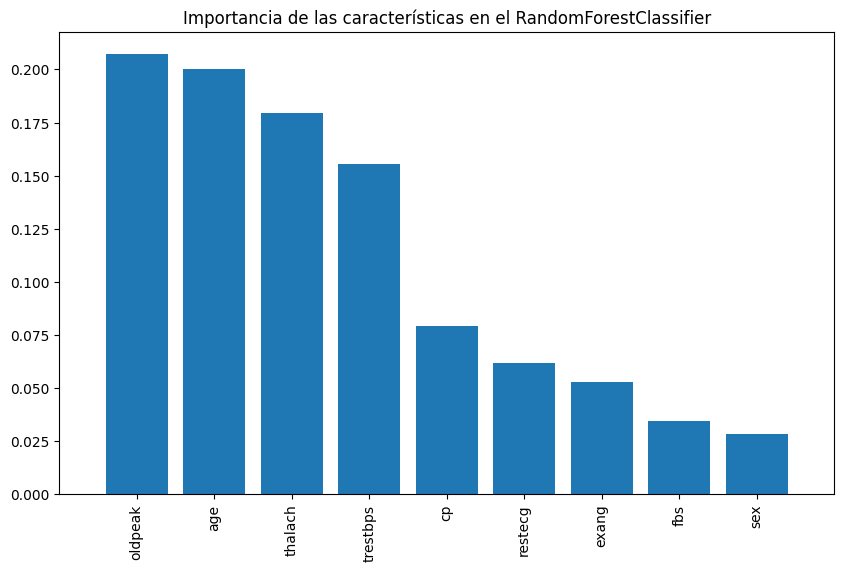

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model5.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end5_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end5_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end5_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end5_sin_label.shape[1]])
plt.show()


In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df5 = test_end5.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df5['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df5.head())



          age  sex  cp  trestbps  fbs  restecg   thalach  exang   oldpeak  \
732  0.591837    1   4     0.780  0.0      2.0  0.415493    1.0  0.475410   
733  0.489796    1   2     0.800  0.0      0.0  0.739437    0.0  0.247253   
734  0.408163    1   2     0.500  0.0      0.0  0.281690    0.0  0.247253   
735  0.693878    1   4     0.575  0.0      0.0  0.478873    1.0  0.393443   
736  0.469388    1   3     0.550  0.0      0.0  0.443662    0.0  0.081967   

     label  
732    4.0  
733    0.0  
734    1.0  
735    3.0  
736    1.0  


In [ ]:
predicted_df5

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,label
732,0.591837,1,4,0.780000,0.0,2.0,0.415493,1.0,0.475410,4.0
733,0.489796,1,2,0.800000,0.0,0.0,0.739437,0.0,0.247253,0.0
734,0.408163,1,2,0.500000,0.0,0.0,0.281690,0.0,0.247253,1.0
735,0.693878,1,4,0.575000,0.0,0.0,0.478873,1.0,0.393443,3.0
736,0.469388,1,3,0.550000,0.0,0.0,0.443662,0.0,0.081967,1.0
...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1,4,1.000000,0.0,0.0,0.577465,1.0,0.311475,3.0
912,0.551020,1,2,0.550000,1.0,1.0,0.845070,0.0,0.247253,0.0
913,0.795918,1,3,0.760000,0.0,2.0,0.633803,0.0,0.114754,0.0
914,0.632653,1,1,0.850000,0.0,2.0,0.697183,0.0,0.016393,0.0


In [ ]:
predicted_df5['label'].value_counts()

0.0    78
3.0    36
1.0    32
2.0    31
4.0     7
Name: label, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df5.reset_index(drop=True, inplace=True)
predicted_df5['ID'] = predicted_df5.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df5[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try39_data.csv', index=False)


In [ ]:
dfactualtry = pd.read_csv('try39_data.csv')

In [ ]:
difference = dfbesttry['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
0     2.0    4.0
2     0.0    1.0
3     1.0    3.0
4     0.0    1.0
8     3.0    1.0
..    ...    ...
170   1.0    0.0
172   0.0    1.0
173   2.0    0.0
179   2.0    3.0
183   1.0    4.0

[71 rows x 2 columns]


In [ ]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 71


## INTENTO 11


In [ ]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [ ]:
df5 = pd.read_csv('../df_cleaned.csv')

In [ ]:
df5.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df5.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,916.000000,916.000000,916.00000,916.000000,857.000000,886.000000,827.000000,914.000000,861.000000,861.000000,854.000000,608.000000,308.000000,433.000000,732.000000
mean,310.460699,53.528384,0.78821,3.255459,132.142357,199.146727,0.165659,0.603939,137.533101,0.390244,0.875878,1.769737,0.678571,5.085450,1.132514
std,219.894251,9.397376,0.40880,0.925783,19.059506,110.762998,0.371999,0.805666,25.939337,0.488088,1.089846,0.617914,0.936378,1.920792,1.257615
min,0.000000,28.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,114.000000,47.000000,1.00000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,273.500000,54.000000,1.00000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,502.250000,60.000000,1.00000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,731.000000,77.000000,1.00000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df5.drop('index', axis=1, inplace=True)

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [ ]:
media_thalach = df5['thalach'].mean()

# Rellenar los NaN con la media calculada
df5['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df5[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [ ]:
print(df5[df5['oldpeak']< 0].value_counts(df5['oldpeak']))

oldpeak
-1.0    2
-0.5    2
-2.6    1
-2.0    1
-1.5    1
-1.1    1
-0.9    1
-0.8    1
-0.7    1
-0.1    1
dtype: int64


In [ ]:
df5['oldpeak'] = df5['oldpeak'].abs()

In [ ]:
print(df5[df5['oldpeak'] >= 0].value_counts(df5['oldpeak']))

oldpeak
0.0    369
1.0     85
2.0     77
1.5     49
3.0     27
0.5     21
1.2     17
2.5     16
0.8     16
1.4     15
1.6     14
0.6     14
0.2     14
1.8     12
0.1     10
0.4     10
4.0      8
2.6      8
2.8      7
1.3      5
1.1      5
1.9      5
0.3      5
0.9      5
2.2      5
0.7      5
2.4      4
3.6      4
3.4      3
4.2      2
3.5      2
2.1      2
3.2      2
1.7      2
3.1      1
2.9      1
3.7      1
3.8      1
2.3      1
4.4      1
5.0      1
5.6      1
6.2      1
dtype: int64


In [ ]:
df5.drop(columns='ca',inplace=True)

In [ ]:
print(df5.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          89
restecg       2
thalach       0
exang        55
oldpeak      62
slope       308
thal        483
label       184
dtype: int64


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN

df5.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['oldpeak']
categorical_cols4 = ['fbs', 'restecg', 'exang', 'slope',]

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df5[numeric_cols4] = numeric_imputer3.fit_transform(df5[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df5[categorical_cols4] = categorical_imputer3.fit_transform(df5[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df5.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal        483
label       184
dtype: int64


In [ ]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df5['chol'] = df5['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df5['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [ ]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df5['thal'] = df5['thal'].apply(sust_thal)
print(df5['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [ ]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df5['trestbps'] = df5['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df5['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [ ]:
df5.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal          0
label       184
dtype: int64

In [ ]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
0,51,1,1,2,2,0.0,2.0,125.0,1.0,1.4,1.0,3.0,0.0
1,54,1,3,2,2,0.0,0.0,150.0,1.0,1.5,2.0,7.0,2.0
2,63,1,4,3,0,0.0,2.0,149.0,0.0,2.0,1.0,0.0,2.0
3,52,0,2,3,0,0.0,0.0,140.0,0.0,0.0,2.0,0.0,0.0
4,55,1,4,3,2,0.0,0.0,111.0,1.0,5.6,3.0,7.0,3.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto StandardScaler
scaler3 = MinMaxScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak', 'thalach']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df5[columns_to_scale3] = scaler3.fit_transform(df5[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "thal", "restecg"]

# Aplicar codificación ordinal
df5[ordinal_vars] = ordinal_encoder.fit_transform(df5[ordinal_vars])

df5.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
0,0.469388,1,1,2,2,0.0,2.0,0.457746,1.0,0.225806,0.0,1.0,0.0
1,0.530612,1,3,2,2,0.0,0.0,0.633803,1.0,0.241935,1.0,3.0,2.0
2,0.714286,1,4,3,0,0.0,2.0,0.626761,0.0,0.322581,0.0,0.0,2.0
3,0.489796,0,2,3,0,0.0,0.0,0.563380,0.0,0.000000,1.0,0.0,0.0
4,0.551020,1,4,3,2,0.0,0.0,0.359155,1.0,0.903226,2.0,3.0,3.0


In [ ]:
# Aplicar codificación de conteo
for var in ["chol", "trestbps", "cp"]:
    df5[var + '_count'] = df5[var].map(df5[var].value_counts())

df5.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label,chol_count,trestbps_count,cp_count
0,0.469388,1,1,2,2,0.0,2.0,0.457746,1.0,0.225806,0.0,1.0,0.0,230,211,44
1,0.530612,1,3,2,2,0.0,0.0,0.633803,1.0,0.241935,1.0,3.0,2.0,230,211,204
2,0.714286,1,4,3,0,0.0,2.0,0.626761,0.0,0.322581,0.0,0.0,2.0,201,485,495
3,0.489796,0,2,3,0,0.0,0.0,0.563380,0.0,0.000000,1.0,0.0,0.0,201,485,173
4,0.551020,1,4,3,2,0.0,0.0,0.359155,1.0,0.903226,2.0,3.0,3.0,230,485,495


In [ ]:
df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label,chol_count,trestbps_count,cp_count
0,0.469388,1,1,2,2,0.0,2.0,0.457746,1.0,0.225806,0.0,1.0,0.0,230,211,44
1,0.530612,1,3,2,2,0.0,0.0,0.633803,1.0,0.241935,1.0,3.0,2.0,230,211,204
2,0.714286,1,4,3,0,0.0,2.0,0.626761,0.0,0.322581,0.0,0.0,2.0,201,485,495
3,0.489796,0,2,3,0,0.0,0.0,0.563380,0.0,0.000000,1.0,0.0,0.0,201,485,173
4,0.551020,1,4,3,2,0.0,0.0,0.359155,1.0,0.903226,2.0,3.0,3.0,230,485,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1,4,3,1,0.0,0.0,0.577465,1.0,0.322581,1.0,0.0,NaN,128,485,495
912,0.551020,1,2,1,2,1.0,1.0,0.845070,0.0,0.146068,1.0,0.0,NaN,230,161,173
913,0.795918,1,3,3,2,0.0,2.0,0.633803,0.0,0.129032,1.0,3.0,NaN,230,485,204
914,0.632653,1,1,3,3,0.0,2.0,0.697183,0.0,0.032258,1.0,3.0,NaN,357,485,44


In [ ]:
train_end5 = df5[0:732]
test_end5 = df5[(916-184):]

In [ ]:
train_end5.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
thal              0
label             0
chol_count        0
trestbps_count    0
cp_count          0
dtype: int64

In [ ]:
test_end5.isna().sum()

age                 0
sex                 0
cp                  0
trestbps            0
chol                0
fbs                 0
restecg             0
thalach             0
exang               0
oldpeak             0
slope               0
thal                0
label             184
chol_count          0
trestbps_count      0
cp_count            0
dtype: int64

In [ ]:
train_end5['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X5 = train_end5.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y5 = train_end5['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X5_train, X5_val, Y5_train, Y5_val = train_test_split(X5, Y5, test_size=0.125, random_state=42)



In [ ]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote3 = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X5_train_smote, Y5_train_smote = smote3.fit_resample(X5_train, Y5_train)

# Ahora, X1_train_smote y Y1_train_smote son tus nuevas características y etiquetas de entrenamiento, respectivamente,
# con las clases minoritarias sobremuestreadas.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X5_train_smote, Y5_train_smote)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 3}, 0.6690140845070423)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X5_train_smote, Y5_train_smote)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': None, 'n_estimators': 100}, 0.8049295774647887)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X5_train_smote, Y5_train_smote)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 10}, 0.4232394366197183)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model5 = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model5.fit(X5_train_smote, Y5_train_smote)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y5_val_pred = rf_model5.predict(X5_val)

# Calcular la precisión
accuracy = accuracy_score(Y5_val, Y5_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.4673913043478261


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(Y5_val, Y5_val_pred, average='micro')  

print(f"El F1-score del modelo en el conjunto de validación es: {f1}")


El F1-score del modelo en el conjunto de validación es: 0.4673913043478261


In [ ]:
# Excluyendo la columna 'label'
test_end5_sin_label = test_end5.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model5.predict(test_end5_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model5.predict_proba(test_end5_sin_label)



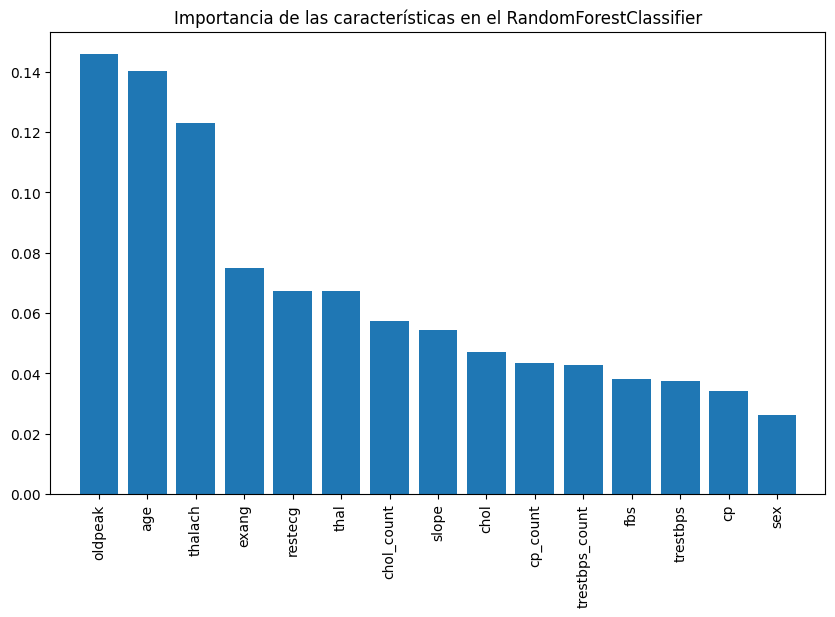

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model5.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end5_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end5_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end5_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end5_sin_label.shape[1]])
plt.show()


In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df5 = test_end5.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df5['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df5.head())



          age  sex  cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.591837    1   4         3     1  0.0      2.0  0.415493    1.0   
733  0.489796    1   2         3     1  0.0      0.0  0.739437    0.0   
734  0.408163    1   2         1     0  0.0      0.0  0.281690    0.0   
735  0.693878    1   4         1     0  0.0      0.0  0.478873    1.0   
736  0.469388    1   3         1     1  0.0      0.0  0.443662    0.0   

      oldpeak  slope  thal  label  chol_count  trestbps_count  cp_count  
732  0.483871    2.0   0.0    2.0         128             485       495  
733  0.000000    1.0   0.0    0.0         128             485       173  
734  0.000000    1.0   0.0    0.0         201             161       173  
735  0.403226    2.0   0.0    3.0         201             161       495  
736  0.096774    0.0   1.0    1.0         128             161       204  


In [ ]:
predicted_df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label,chol_count,trestbps_count,cp_count
732,0.591837,1,4,3,1,0.0,2.0,0.415493,1.0,0.483871,2.0,0.0,2.0,128,485,495
733,0.489796,1,2,3,1,0.0,0.0,0.739437,0.0,0.000000,1.0,0.0,0.0,128,485,173
734,0.408163,1,2,1,0,0.0,0.0,0.281690,0.0,0.000000,1.0,0.0,0.0,201,161,173
735,0.693878,1,4,1,0,0.0,0.0,0.478873,1.0,0.403226,2.0,0.0,3.0,201,161,495
736,0.469388,1,3,1,1,0.0,0.0,0.443662,0.0,0.096774,0.0,1.0,1.0,128,161,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1,4,3,1,0.0,0.0,0.577465,1.0,0.322581,1.0,0.0,2.0,128,485,495
912,0.551020,1,2,1,2,1.0,1.0,0.845070,0.0,0.146068,1.0,0.0,0.0,230,161,173
913,0.795918,1,3,3,2,0.0,2.0,0.633803,0.0,0.129032,1.0,3.0,0.0,230,485,204
914,0.632653,1,1,3,3,0.0,2.0,0.697183,0.0,0.032258,1.0,3.0,0.0,357,485,44


In [ ]:
predicted_df5['label'].value_counts()

0.0    86
1.0    37
2.0    28
3.0    28
4.0     5
Name: label, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df5.reset_index(drop=True, inplace=True)
predicted_df5['ID'] = predicted_df5.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df5[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try35_data.csv', index=False)


In [ ]:
dfactualtry = pd.read_csv('try35_data.csv')

In [ ]:
difference = dfbesttry['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
3     1.0    3.0
4     0.0    1.0
7     2.0    1.0
14    0.0    1.0
21    1.0    3.0
22    0.0    1.0
24    3.0    2.0
29    0.0    4.0
39    2.0    1.0
40    0.0    2.0
43    2.0    3.0
46    3.0    1.0
50    2.0    0.0
52    2.0    4.0
54    1.0    2.0
57    1.0    2.0
59    0.0    1.0
60    2.0    3.0
61    1.0    2.0
68    1.0    2.0
76    0.0    1.0
78    0.0    2.0
83    1.0    3.0
88    2.0    3.0
90    0.0    3.0
97    2.0    3.0
98    1.0    0.0
104   2.0    4.0
106   0.0    4.0
113   0.0    3.0
116   1.0    3.0
117   0.0    2.0
126   0.0    2.0
130   0.0    2.0
134   3.0    2.0
135   1.0    3.0
136   0.0    1.0
138   3.0    2.0
140   1.0    2.0
142   0.0    3.0
148   3.0    2.0
149   3.0    2.0
154   3.0    1.0
155   0.0    1.0
160   3.0    2.0
164   1.0    2.0
166   3.0    4.0
172   0.0    1.0
173   2.0    1.0
176   0.0    1.0


In [ ]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 50


## INTENTO 12 / 4.1

In [ ]:
df4 = pd.read_csv('../df_cleaned.csv')

In [ ]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [ ]:
df4.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df4

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54,1,4,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,NaN,NaN,NaN
912,180,55,1,2,110.0,214.0,1.0,1.0,180.0,0.0,NaN,NaN,NaN,NaN,NaN
913,181,67,1,3,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,NaN
914,182,59,1,1,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,NaN


In [ ]:
df4.drop('index', axis=1, inplace=True)

In [ ]:
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [ ]:
media_thalach = df4['thalach'].mean()

# Rellenar los NaN con la media calculada
df4['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df4[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df4.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['age', 'oldpeak']
categorical_cols4 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'label']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df4[numeric_cols4] = numeric_imputer3.fit_transform(df4[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df4[categorical_cols4] = categorical_imputer3.fit_transform(df4[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df4.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal        483
label         0
dtype: int64


In [ ]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df4['chol'] = df4['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df4['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [ ]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df4['thal'] = df4['thal'].apply(sust_thal)
print(df4['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [ ]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df4['trestbps'] = df4['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df4['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [ ]:
def categorizar_thalach_correcta(edad, sexo, thalach):
    # Categorías basadas en la tabla para hombres y mujeres
    # Los rangos se ajustan para reflejar el límite superior inclusivo
    categorias_hombres = [(86, 200), (70, 85), (62, 69), (60, 61)]  # Inadecuado, Normal, Bueno, Excelente
    categorias_mujeres = [(96, 200), (78, 95), (72, 77), (70, 71)]
    
    # Seleccionar los límites según el sexo
    limites = categorias_hombres if sexo == 1 else categorias_mujeres
    
    # Asignar categorías según la edad
    if edad < 30:
        rango_edad = 0
    elif edad <= 39:
        rango_edad = 1
    elif edad <= 49:
        rango_edad = 2
    else:  # edad >= 50
        rango_edad = 3
    
    # Verificar si thalach es NaN
    if pd.isnull(thalach):
        return 5  # Podemos asignar un 5 para valores NaN o no clasificables
    
    # Determinar la categoría basada en el valor de thalach
    # Devolveremos la categoría basada en el límite que se cruce primero, desde la mejor a la peor
    for i, (limite_inferior, limite_superior) in enumerate(limites):
        if limite_inferior <= thalach <= limite_superior:
            return 4 - i if rango_edad == i else 1  # Excelente si el rango de edad coincide, sino Inadecuado
    
    return 1  # Por defecto, si no encaja en ningún otro rango, se considera Inadecuado

# Aplicar la función actualizada al DataFrame
df4['thalach_cat'] = df4.apply(lambda fila: categorizar_thalach_correcta(fila['age'], fila['sex'], fila['thalach']), axis=1)

# Mostrar los primeros registros para verificar el resultado
print(df4[['age', 'sex', 'thalach', 'thalach_cat']].head())


    age  sex  thalach  thalach_cat
0  51.0  1.0    125.0            1
1  54.0  1.0    150.0            1
2  63.0  1.0    149.0            1
3  52.0  0.0    140.0            1
4  55.0  1.0    111.0            1


In [ ]:
df4.isnull().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
label          0
thalach_cat    0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto StandardScaler
scaler3 = MinMaxScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df4[columns_to_scale3] = scaler3.fit_transform(df4[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "ca", "thal", "restecg"]

# Aplicar codificación ordinal
df4[ordinal_vars] = ordinal_encoder.fit_transform(df4[ordinal_vars])

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat
0,0.469388,1.0,1.0,2,2,0.0,2.0,125.0,1.0,0.454545,0.0,1.0,1.0,0.0,1
1,0.530612,1.0,3.0,2,2,0.0,0.0,150.0,1.0,0.465909,1.0,0.0,3.0,2.0,1
2,0.714286,1.0,4.0,3,0,0.0,2.0,149.0,0.0,0.522727,0.0,0.0,0.0,2.0,1
3,0.489796,0.0,2.0,3,0,0.0,0.0,140.0,0.0,0.295455,1.0,0.0,0.0,0.0,1
4,0.551020,1.0,4.0,3,2,0.0,0.0,111.0,1.0,0.931818,2.0,0.0,3.0,3.0,1


In [ ]:
# Aplicar codificación de conteo
for var in ["chol", "thalach_cat", "trestbps", "cp"]:
    df4[var + '_count'] = df4[var].map(df4[var].value_counts())

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,125.0,1.0,0.454545,0.0,1.0,1.0,0.0,1,230,913,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,150.0,1.0,0.465909,1.0,0.0,3.0,2.0,1,230,913,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,149.0,0.0,0.522727,0.0,0.0,0.0,2.0,1,201,913,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,140.0,0.0,0.295455,1.0,0.0,0.0,0.0,1,201,913,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,111.0,1.0,0.931818,2.0,0.0,3.0,3.0,1,230,913,485,495


In [ ]:
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,125.000000,1.0,0.454545,0.0,1.0,1.0,0.0,1,230,913,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,150.000000,1.0,0.465909,1.0,0.0,3.0,2.0,1,230,913,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,149.000000,0.0,0.522727,0.0,0.0,0.0,2.0,1,201,913,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,140.000000,0.0,0.295455,1.0,0.0,0.0,0.0,1,201,913,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,111.000000,1.0,0.931818,2.0,0.0,3.0,3.0,1,230,913,485,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1.0,4.0,3,1,0.0,0.0,142.000000,1.0,0.522727,1.0,0.0,0.0,0.0,1,128,913,485,495
912,0.551020,1.0,2.0,1,2,1.0,1.0,180.000000,0.0,0.394986,1.0,0.0,0.0,0.0,1,230,913,161,173
913,0.795918,1.0,3.0,3,2,0.0,2.0,150.000000,0.0,0.386364,1.0,0.0,3.0,0.0,1,230,913,485,204
914,0.632653,1.0,1.0,3,3,0.0,2.0,159.000000,0.0,0.318182,1.0,0.0,3.0,0.0,1,357,913,485,44


In [ ]:
train_end4 = df4[0:732]
test_end4 = df4[(916-184):]

In [ ]:
train_end4.isna().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
label                0
thalach_cat          0
chol_count           0
thalach_cat_count    0
trestbps_count       0
cp_count             0
dtype: int64

In [ ]:
test_end4.isna().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
label                0
thalach_cat          0
chol_count           0
thalach_cat_count    0
trestbps_count       0
cp_count             0
dtype: int64

In [ ]:
train_end4['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X4 = train_end4.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y4 = train_end4['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4, Y4, test_size=0.125, random_state=42)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X4_train, Y4_train)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 9}, 0.4734375)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X4_train, Y4_train)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': 30, 'n_estimators': 100}, 0.521875)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X4_train, Y4_train)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 0.1}, 0.5046875)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model4 = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model4.fit(X4_train, Y4_train)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=30, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y4_val_pred = rf_model4.predict(X4_val)

# Calcular la precisión
accuracy = accuracy_score(Y4_val, Y4_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.5217391304347826


In [ ]:
# Excluyendo la columna 'label'
test_end4_sin_label = test_end4.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model4.predict(test_end4_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model4.predict_proba(test_end4_sin_label)



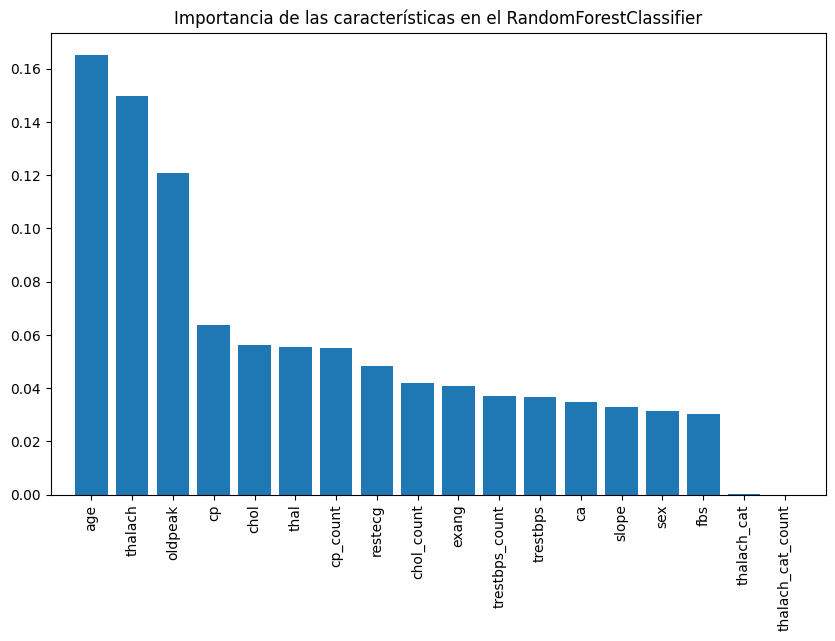

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model4.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end4_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end4_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end4_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end4_sin_label.shape[1]])
plt.show()


In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df4 = test_end4.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df4['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df4.head())



          age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  \
732  0.591837  1.0  4.0         3     1  0.0      2.0    119.0    1.0   
733  0.489796  1.0  2.0         3     1  0.0      0.0    165.0    0.0   
734  0.408163  1.0  2.0         1     0  0.0      0.0    100.0    0.0   
735  0.693878  1.0  4.0         1     0  0.0      0.0    128.0    1.0   
736  0.469388  1.0  3.0         1     1  0.0      0.0    123.0    0.0   

      oldpeak  slope   ca  thal  label  thalach_cat  chol_count  \
732  0.636364    2.0  0.0   0.0    2.0            1         128   
733  0.295455    1.0  0.0   0.0    0.0            1         128   
734  0.295455    1.0  0.0   0.0    0.0            1         201   
735  0.579545    2.0  0.0   0.0    2.0            1         201   
736  0.363636    0.0  0.0   1.0    1.0            1         128   

     thalach_cat_count  trestbps_count  cp_count  
732                913             485       495  
733                913             485       173  
734  

In [ ]:
predicted_df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
732,0.591837,1.0,4.0,3,1,0.0,2.0,119.000000,1.0,0.636364,2.0,0.0,0.0,2.0,1,128,913,485,495
733,0.489796,1.0,2.0,3,1,0.0,0.0,165.000000,0.0,0.295455,1.0,0.0,0.0,0.0,1,128,913,485,173
734,0.408163,1.0,2.0,1,0,0.0,0.0,100.000000,0.0,0.295455,1.0,0.0,0.0,0.0,1,201,913,161,173
735,0.693878,1.0,4.0,1,0,0.0,0.0,128.000000,1.0,0.579545,2.0,0.0,0.0,2.0,1,201,913,161,495
736,0.469388,1.0,3.0,1,1,0.0,0.0,123.000000,0.0,0.363636,0.0,0.0,1.0,1.0,1,128,913,161,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1.0,4.0,3,1,0.0,0.0,142.000000,1.0,0.522727,1.0,0.0,0.0,2.0,1,128,913,485,495
912,0.551020,1.0,2.0,1,2,1.0,1.0,180.000000,0.0,0.394986,1.0,0.0,0.0,0.0,1,230,913,161,173
913,0.795918,1.0,3.0,3,2,0.0,2.0,150.000000,0.0,0.386364,1.0,0.0,3.0,0.0,1,230,913,485,204
914,0.632653,1.0,1.0,3,3,0.0,2.0,159.000000,0.0,0.318182,1.0,0.0,3.0,0.0,1,357,913,485,44


In [ ]:
predicted_df4['label'].value_counts()

0.0    96
1.0    37
2.0    28
3.0    23
Name: label, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df4.reset_index(drop=True, inplace=True)
predicted_df4['ID'] = predicted_df4.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df4[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try50_data.csv', index=False)


In [ ]:
df46best = pd.read_csv('try46best_data.csv')
dfactualtry = pd.read_csv('try50_data.csv')

In [ ]:
difference = df46best['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

Empty DataFrame
Columns: [self, other]
Index: []


In [ ]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 0


## INTENTO 13/4.2 CORRELACIONES

In [ ]:
df4 = pd.read_csv('../df_cleaned.csv')

In [ ]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [ ]:
df4.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df4

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54,1,4,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,NaN,NaN,NaN
912,180,55,1,2,110.0,214.0,1.0,1.0,180.0,0.0,NaN,NaN,NaN,NaN,NaN
913,181,67,1,3,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,NaN
914,182,59,1,1,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,NaN


In [ ]:
df4.drop('index', axis=1, inplace=True)

In [ ]:
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [ ]:
media_thalach = df4['thalach'].mean()

# Rellenar los NaN con la media calculada
df4['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df4[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df4.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['age', 'oldpeak']
categorical_cols4 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'label']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df4[numeric_cols4] = numeric_imputer3.fit_transform(df4[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df4[categorical_cols4] = categorical_imputer3.fit_transform(df4[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df4.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal        483
label         0
dtype: int64


In [ ]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df4['chol'] = df4['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df4['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [ ]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df4['thal'] = df4['thal'].apply(sust_thal)
print(df4['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [ ]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df4['trestbps'] = df4['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df4['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [ ]:
def categorizar_thalach_correcta(edad, sexo, thalach):
    # Categorías basadas en la tabla para hombres y mujeres
    # Los rangos se ajustan para reflejar el límite superior inclusivo
    categorias_hombres = [(86, 200), (70, 85), (62, 69), (60, 61)]  # Inadecuado, Normal, Bueno, Excelente
    categorias_mujeres = [(96, 200), (78, 95), (72, 77), (70, 71)]
    
    # Seleccionar los límites según el sexo
    limites = categorias_hombres if sexo == 1 else categorias_mujeres
    
    # Asignar categorías según la edad
    if edad < 30:
        rango_edad = 0
    elif edad <= 39:
        rango_edad = 1
    elif edad <= 49:
        rango_edad = 2
    else:  # edad >= 50
        rango_edad = 3
    
    # Verificar si thalach es NaN
    if pd.isnull(thalach):
        return 5  # Podemos asignar un 5 para valores NaN o no clasificables
    
    # Determinar la categoría basada en el valor de thalach
    # Devolveremos la categoría basada en el límite que se cruce primero, desde la mejor a la peor
    for i, (limite_inferior, limite_superior) in enumerate(limites):
        if limite_inferior <= thalach <= limite_superior:
            return 4 - i if rango_edad == i else 1  # Excelente si el rango de edad coincide, sino Inadecuado
    
    return 1  # Por defecto, si no encaja en ningún otro rango, se considera Inadecuado

# Aplicar la función actualizada al DataFrame
df4['thalach_cat'] = df4.apply(lambda fila: categorizar_thalach_correcta(fila['age'], fila['sex'], fila['thalach']), axis=1)

# Mostrar los primeros registros para verificar el resultado
print(df4[['age', 'sex', 'thalach', 'thalach_cat']].head())


    age  sex  thalach  thalach_cat
0  51.0  1.0    125.0            1
1  54.0  1.0    150.0            1
2  63.0  1.0    149.0            1
3  52.0  0.0    140.0            1
4  55.0  1.0    111.0            1


In [ ]:
df4.isnull().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
label          0
thalach_cat    0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto StandardScaler
scaler3 = MinMaxScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df4[columns_to_scale3] = scaler3.fit_transform(df4[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "ca", "thal", "restecg"]

# Aplicar codificación ordinal
df4[ordinal_vars] = ordinal_encoder.fit_transform(df4[ordinal_vars])

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat
0,0.469388,1.0,1.0,2,2,0.0,2.0,125.0,1.0,0.454545,0.0,1.0,1.0,0.0,1
1,0.530612,1.0,3.0,2,2,0.0,0.0,150.0,1.0,0.465909,1.0,0.0,3.0,2.0,1
2,0.714286,1.0,4.0,3,0,0.0,2.0,149.0,0.0,0.522727,0.0,0.0,0.0,2.0,1
3,0.489796,0.0,2.0,3,0,0.0,0.0,140.0,0.0,0.295455,1.0,0.0,0.0,0.0,1
4,0.551020,1.0,4.0,3,2,0.0,0.0,111.0,1.0,0.931818,2.0,0.0,3.0,3.0,1


In [ ]:
# Aplicar codificación de conteo
for var in ["chol", "thalach_cat", "trestbps", "cp"]:
    df4[var + '_count'] = df4[var].map(df4[var].value_counts())

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,125.0,1.0,0.454545,0.0,1.0,1.0,0.0,1,230,913,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,150.0,1.0,0.465909,1.0,0.0,3.0,2.0,1,230,913,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,149.0,0.0,0.522727,0.0,0.0,0.0,2.0,1,201,913,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,140.0,0.0,0.295455,1.0,0.0,0.0,0.0,1,201,913,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,111.0,1.0,0.931818,2.0,0.0,3.0,3.0,1,230,913,485,495


In [ ]:
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,125.000000,1.0,0.454545,0.0,1.0,1.0,0.0,1,230,913,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,150.000000,1.0,0.465909,1.0,0.0,3.0,2.0,1,230,913,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,149.000000,0.0,0.522727,0.0,0.0,0.0,2.0,1,201,913,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,140.000000,0.0,0.295455,1.0,0.0,0.0,0.0,1,201,913,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,111.000000,1.0,0.931818,2.0,0.0,3.0,3.0,1,230,913,485,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1.0,4.0,3,1,0.0,0.0,142.000000,1.0,0.522727,1.0,0.0,0.0,0.0,1,128,913,485,495
912,0.551020,1.0,2.0,1,2,1.0,1.0,180.000000,0.0,0.394986,1.0,0.0,0.0,0.0,1,230,913,161,173
913,0.795918,1.0,3.0,3,2,0.0,2.0,150.000000,0.0,0.386364,1.0,0.0,3.0,0.0,1,230,913,485,204
914,0.632653,1.0,1.0,3,3,0.0,2.0,159.000000,0.0,0.318182,1.0,0.0,3.0,0.0,1,357,913,485,44


In [ ]:
train_end4 = df4[0:732]
test_end4 = df4[(916-184):]

In [ ]:
train_end4.isna().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
label                0
thalach_cat          0
chol_count           0
thalach_cat_count    0
trestbps_count       0
cp_count             0
dtype: int64

In [ ]:
test_end4.isna().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
label                0
thalach_cat          0
chol_count           0
thalach_cat_count    0
trestbps_count       0
cp_count             0
dtype: int64

In [ ]:
train_end4['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X4 = train_end4.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y4 = train_end4['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4, Y4, test_size=0.125, random_state=42)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X4_train, Y4_train)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 9}, 0.4734375)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X4_train, Y4_train)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': 30, 'n_estimators': 100}, 0.521875)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X4_train, Y4_train)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 0.1}, 0.5046875)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model4 = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model4.fit(X4_train, Y4_train)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=30, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y4_val_pred = rf_model4.predict(X4_val)

# Calcular la precisión
accuracy = accuracy_score(Y4_val, Y4_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.5217391304347826


In [ ]:
# Excluyendo la columna 'label'
test_end4_sin_label = test_end4.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model4.predict(test_end4_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model4.predict_proba(test_end4_sin_label)



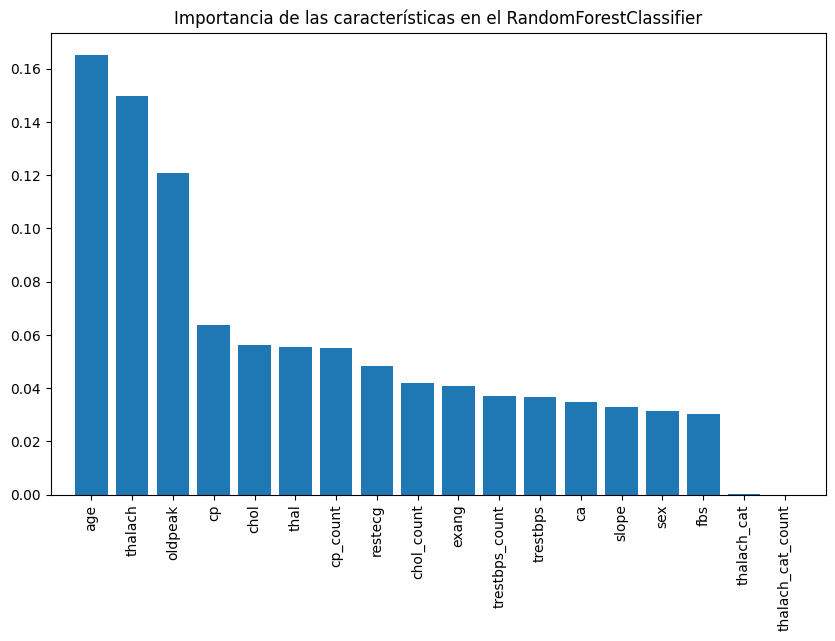

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model4.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end4_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end4_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end4_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end4_sin_label.shape[1]])
plt.show()


In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df4 = test_end4.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df4['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df4.head())



          age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  \
732  0.591837  1.0  4.0         3     1  0.0      2.0    119.0    1.0   
733  0.489796  1.0  2.0         3     1  0.0      0.0    165.0    0.0   
734  0.408163  1.0  2.0         1     0  0.0      0.0    100.0    0.0   
735  0.693878  1.0  4.0         1     0  0.0      0.0    128.0    1.0   
736  0.469388  1.0  3.0         1     1  0.0      0.0    123.0    0.0   

      oldpeak  slope   ca  thal  label  thalach_cat  chol_count  \
732  0.636364    2.0  0.0   0.0    2.0            1         128   
733  0.295455    1.0  0.0   0.0    0.0            1         128   
734  0.295455    1.0  0.0   0.0    0.0            1         201   
735  0.579545    2.0  0.0   0.0    2.0            1         201   
736  0.363636    0.0  0.0   1.0    1.0            1         128   

     thalach_cat_count  trestbps_count  cp_count  
732                913             485       495  
733                913             485       173  
734  

In [ ]:
predicted_df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
732,0.591837,1.0,4.0,3,1,0.0,2.0,119.000000,1.0,0.636364,2.0,0.0,0.0,2.0,1,128,913,485,495
733,0.489796,1.0,2.0,3,1,0.0,0.0,165.000000,0.0,0.295455,1.0,0.0,0.0,0.0,1,128,913,485,173
734,0.408163,1.0,2.0,1,0,0.0,0.0,100.000000,0.0,0.295455,1.0,0.0,0.0,0.0,1,201,913,161,173
735,0.693878,1.0,4.0,1,0,0.0,0.0,128.000000,1.0,0.579545,2.0,0.0,0.0,2.0,1,201,913,161,495
736,0.469388,1.0,3.0,1,1,0.0,0.0,123.000000,0.0,0.363636,0.0,0.0,1.0,1.0,1,128,913,161,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1.0,4.0,3,1,0.0,0.0,142.000000,1.0,0.522727,1.0,0.0,0.0,2.0,1,128,913,485,495
912,0.551020,1.0,2.0,1,2,1.0,1.0,180.000000,0.0,0.394986,1.0,0.0,0.0,0.0,1,230,913,161,173
913,0.795918,1.0,3.0,3,2,0.0,2.0,150.000000,0.0,0.386364,1.0,0.0,3.0,0.0,1,230,913,485,204
914,0.632653,1.0,1.0,3,3,0.0,2.0,159.000000,0.0,0.318182,1.0,0.0,3.0,0.0,1,357,913,485,44


In [ ]:
predicted_df4['label'].value_counts()

0.0    96
1.0    37
2.0    28
3.0    23
Name: label, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df4.reset_index(drop=True, inplace=True)
predicted_df4['ID'] = predicted_df4.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df4[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try50_data.csv', index=False)


In [ ]:
df46best = pd.read_csv('try46best_data.csv')
dfactualtry = pd.read_csv('try50_data.csv')

In [ ]:
difference = df46best['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

Empty DataFrame
Columns: [self, other]
Index: []


In [ ]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 0
